<a href="https://colab.research.google.com/github/RobbieEarle/csci4146/blob/main/CSCI4146_Robbie_Earle_Harris_Dexter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>CSCI - 4146 - The Process of Data Science - Fall 2020</h1></center>
<h1><center>Assignment 1</h1></center>

<b>Harris Dexter</b>  
\<B003272872\>  


<b>Robbie Earle</b>  
\<B00758329\>  


## 1. Data understanding and preprocessing

In [2]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                     title                                              size  lastUpdated          downloadCount  
------------------------------------------------------  -----------------------------------------------  ------  -------------------  -------------  
unanimad/us-election-2020                               US Election 2020                                  428KB  2020-11-18 10:16:32           5975  
antgoldbloom/covid19-data-from-john-hopkins-university  COVID-19 data from John Hopkins University          2MB  2020-11-18 06:04:19           2441  
manchunhui/us-election-2020-tweets                      US Election 2020 Tweets                           353MB  2020-11-09 18:51:59           2793  
headsortails/us-election-2020-presidential-debates      US Election 2020 - Presidential Debates           199MB  2020-10-23 16:56:10            497  
etsc9287/2020-general-election-polls                    Election, 

In [3]:
! kaggle datasets download -d airbnb/boston
! mkdir boston_data
! unzip boston.zip -d boston_data
! ls boston_data

 56% 9.00M/16.1M [00:02<00:01, 4.47MB/s]
100% 16.1M/16.1M [00:02<00:00, 7.79MB/s]
Archive:  boston.zip
  inflating: boston_data/calendar.csv  
  inflating: boston_data/listings.csv  
  inflating: boston_data/reviews.csv  
calendar.csv  listings.csv  reviews.csv


**ABT**

In [111]:
import pandas as pd
listings_df = pd.read_csv('boston_data/listings.csv')
abt = listings_df.copy()
abt['target'] = abt['price']
display(abt.head(2))

id                            listing_url  ...  reviews_per_month   target
0  12147973  https://www.airbnb.com/rooms/12147973  ...                NaN  $250.00
1   3075044   https://www.airbnb.com/rooms/3075044  ...                1.3   $65.00

[2 rows x 96 columns]

#### 1.a) Data Quality Report

In [112]:
# These functions were given by Maksym in Tutorial 2 to generate the analytics 
# base tables for both continuous and categorical features

def buildContinuousFeaturesReport(features, data_df):
  conHead = ['Count', 'Miss %', 'Card.', 'Min', '1st Qrt.',
            'Mean', 'Median', '3rd Qrt', 'Max', 'Std. Dev.']

  conOut_df = pd.DataFrame(index=features, columns=conHead)
  columns_df = data_df[features]

  #COUNT
  conOut_df[conHead[0]] = len(columns_df)
  #MISS % 
  conOut_df[conHead[1]] = columns_df.isna().sum() / len(columns_df) * 100
  #CARDINALITY
  conOut_df[conHead[2]] = columns_df.nunique()
  #MINIMUM
  conOut_df[conHead[3]] = columns_df.min()
  #1ST QUARTILE
  conOut_df[conHead[4]] = columns_df.quantile(0.25)
  #MEAN
  conOut_df[conHead[5]] = columns_df.mean()
  #MEDIAN
  conOut_df[conHead[6]] = columns_df.median()
  #3rd QUARTILE
  conOut_df[conHead[7]] = columns_df.quantile(0.75)
  #MAX
  conOut_df[conHead[8]] = columns_df.max()
  #STANDARD DEVIATION
  conOut_df[conHead[9]] = columns_df.std()
  
  return conOut_df

def buildCategoricalFeaturesReport(features, data_df):
  catHead = ['Count', 'Miss %', 'Card.', 'Mode', 'Mode Freq',
             'Mode %', '2nd Mode', '2nd Mode Freq', '2nd Mode %']

  columns_df = data_df[features]
  #preparing a dictionary for storing data
  stats_dict = {k: ['']*len(features) for k in catHead}
 
  #CARDINALITY
  stats_dict['Card.'] = columns_df.nunique()
  missing = columns_df.isna().sum() / len(columns_df) * 100
  
  for col in columns_df:
    values = columns_df[col].value_counts()
    index = features.index(col)

    if len(values.index) > 0:
    
      #COUNT
      stats_dict['Count'][index] = len(columns_df)
  
      #MISS %
      stats_dict['Miss %'][index] = missing[col]

      #MODES
      mode = values.index[0]
      # if len(values.index) > 1:
      #   mode2 = values.index[1]
      # else:
      #   mode2 = mode
      mode2 = values.index[1] if len(values.index) > 1 else mode
      stats_dict['Mode'][index] = mode
      stats_dict['2nd Mode'][index] = mode2
      
      #MODE FREQ
      modeCount = values.loc[mode]
      modeCount2 = values.loc[mode2]
      stats_dict['Mode Freq'][index] = modeCount
      stats_dict['2nd Mode Freq'][index] = modeCount2
      
      #MODE %
      miss = stats_dict['Miss %'][index]
      modePer = (modeCount/(len(columns_df)*((100-miss)/100)))*100
      stats_dict['Mode %'][index] = round(modePer, 2)
      modePer2 = (modeCount2/(len(columns_df)*((100-miss)/100)))*100
      stats_dict['2nd Mode %'][index] = round(modePer2, 2)

  output_df = pd.DataFrame.from_dict(stats_dict)
  return output_df

**Raw Continuous Features**

In [113]:
with pd.option_context('display.float_format', '{:.2f}'.format):
  display(buildContinuousFeaturesReport(listings_df.select_dtypes('number').columns.to_list(), listings_df))

Count  Miss %  ...               Max   Std. Dev.
id                               3585    0.00  ...       14933461.00  4500786.86
scrape_id                        3585    0.00  ... 20160906204935.00        0.85
host_id                          3585    0.00  ...       93854106.00 22927809.87
host_listings_count              3585    0.00  ...            749.00      171.12
host_total_listings_count        3585    0.00  ...            749.00      171.12
neighbourhood_group_cleansed     3585  100.00  ...               nan         nan
latitude                         3585    0.00  ...             42.39        0.02
longitude                        3585    0.00  ...            -71.00        0.03
accommodates                     3585    0.00  ...             16.00        1.78
bathrooms                        3585    0.39  ...              6.00        0.50
bedrooms                         3585    0.28  ...              5.00        0.75
beds                             3585    0.25  ...             16.00        1.01
square_feet                      3585   98.44  ...           2400.00      608.87
guests_included                  3585    0.00  ...             14.00        1.06
minimum_nights                   3585    0.00  ...            300.00        8.87
maximum_nights                   3585    0.00  ...       99999999.00  1670135.94
has_availability                 3585  100.00  ...               nan         nan
availability_30                  3585    0.00  ...             30.00       10.44
availability_60                  3585    0.00  ...             60.00       21.86
availability_90                  3585    0.00  ...             90.00       33.16
availability_365                 3585    0.00  ...            365.00      142.14
number_of_reviews                3585    0.00  ...            404.00       35.57
review_scores_rating             3585   22.68  ...            100.00        9.53
review_scores_accuracy           3585   22.96  ...             10.00        0.93
review_scores_cleanliness        3585   22.82  ...             10.00        1.17
review_scores_checkin            3585   22.87  ...             10.00        0.76
review_scores_communication      3585   22.82  ...             10.00        0.74
review_scores_location           3585   22.93  ...             10.00        0.90
review_scores_value              3585   22.90  ...             10.00        1.01
license                          3585  100.00  ...               nan         nan
jurisdiction_names               3585  100.00  ...               nan         nan
calculated_host_listings_count   3585    0.00  ...            136.00       29.42
reviews_per_month                3585   21.09  ...             19.15        2.12

[33 rows x 10 columns]

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


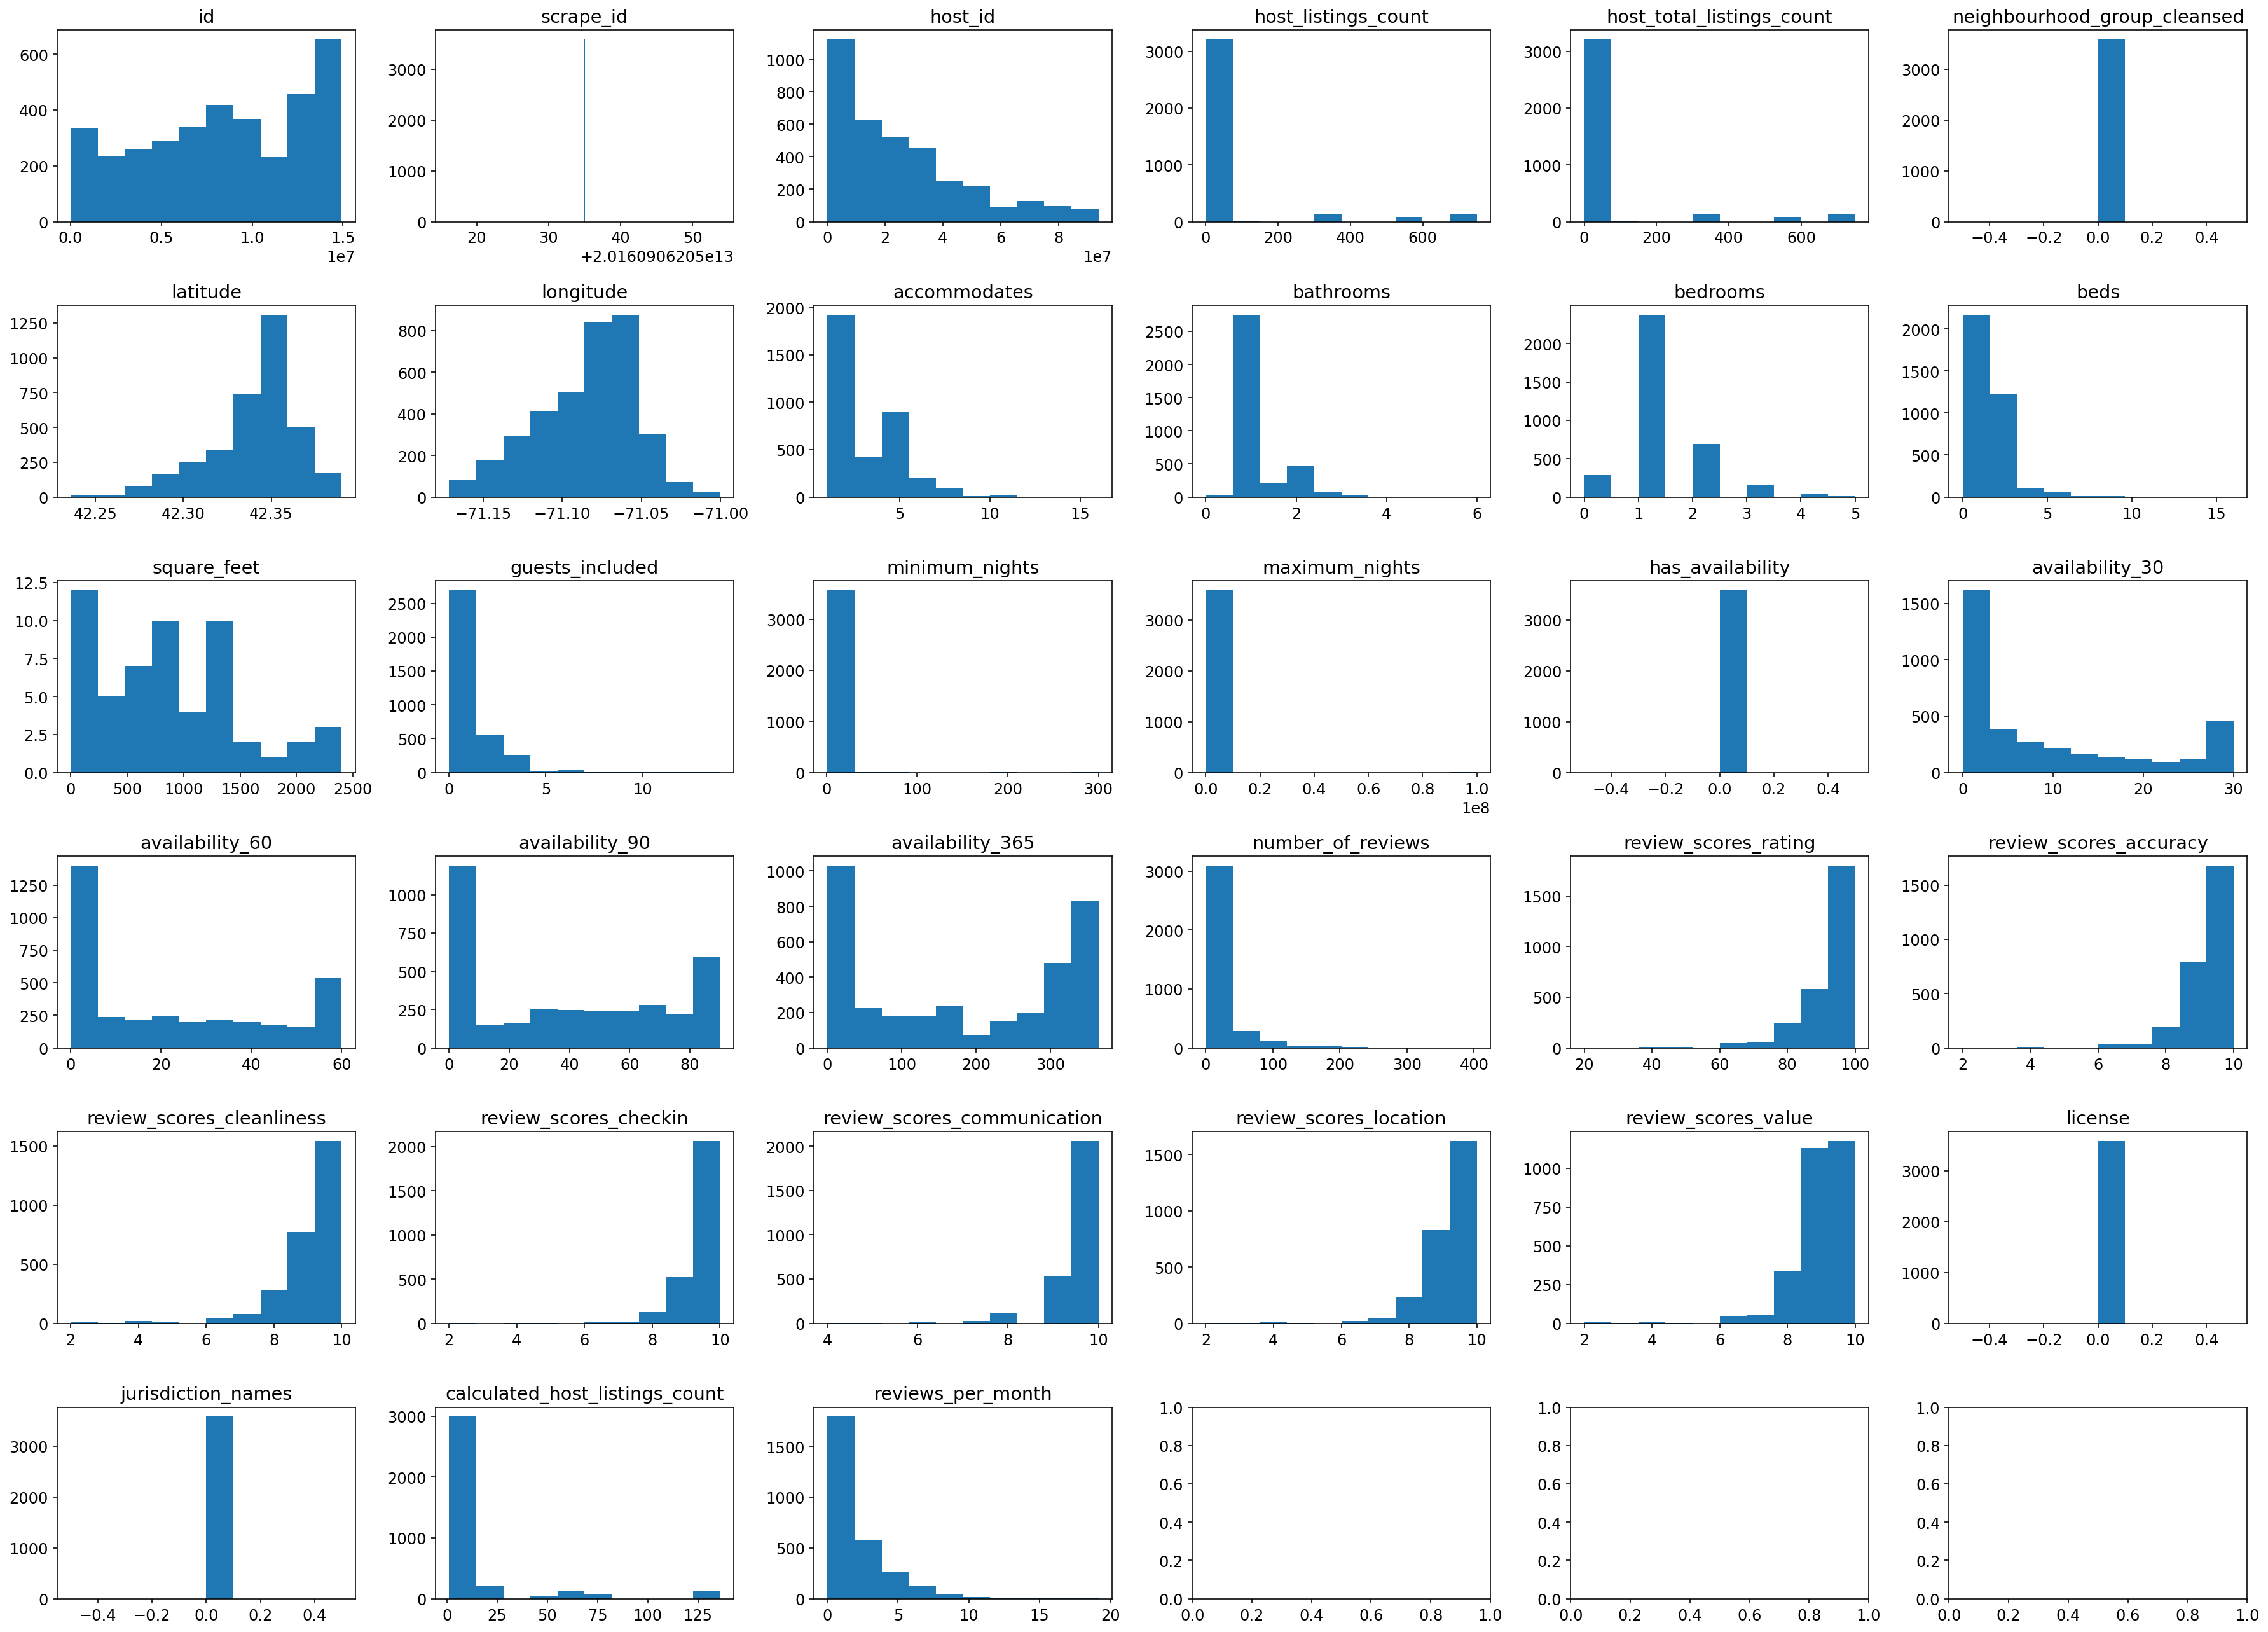

In [114]:
from matplotlib import pyplot as plt
import math

%config InlineBackend.figure_format = 'retina'
plt.rcParams["font.size"] = 12
bad_cols = ['neighbourhood_group_cleansed',  'has_availability',
            'license', 'jurisdiction_names']

# A few of the continuous features have nan values for all entries. Matplotlib 
# does not play nice with these entries, so we convert them all to 0's for now. 
# These features will be removed in the next step but for the sake of 
# completeness we leave them in for now (we want to histograms to accurately
# represent all features present in the data quality report)
listings_df_adj = listings_df.copy()
for col in bad_cols:
  listings_df_adj[col] = listings_df_adj[col].apply(lambda x: 0 if math.isnan(x) else x)
          
cols = listings_df_adj.select_dtypes('number').columns.to_list()
fig, axes = plt.subplots(nrows=int(math.ceil(len(cols) / 6)), ncols=6, figsize=(25, 18), squeeze=False)

for i, feature in enumerate(cols):
    axes[int(i/6)][int(i%6)].hist(listings_df_adj[feature])
    axes[int(i/6)][int(i%6)].set_title(feature)
fig.tight_layout()

**Raw Categorical Features**

In [115]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None), pd.option_context('display.float_format', '{:.2f}'.format):
  display(buildCategoricalFeaturesReport(listings_df.select_dtypes(include='object').columns.to_list(), listings_df))

Count  Miss %  Card.  \
listing_url                        3585    0.00   3585   
last_scraped                       3585    0.00      1   
name                               3585    0.00   3504   
summary                            3585    3.99   3113   
space                              3585   29.48   2268   
description                        3585    0.00   3423   
experiences_offered                3585    0.00      1   
neighborhood_overview              3585   39.47   1728   
notes                              3585   55.09   1269   
transit                            3585   35.98   1859   
access                             3585   41.53   1762   
interaction                        3585   43.35   1617   
house_rules                        3585   33.25   1928   
thumbnail_url                      3585   16.71   2986   
medium_url                         3585   16.71   2986   
picture_url                        3585    0.00   3585   
xl_picture_url                     3585   16.71   2986   
host_url                           3585    0.00   2181   
host_name                          3585    0.00   1334   
host_since                         3585    0.00   1281   
host_location                      3585    0.31    176   
host_about                         3585   36.51   1240   
host_response_time                 3585   13.14      4   
host_response_rate                 3585   13.14     52   
host_acceptance_rate               3585   13.14     72   
host_is_superhost                  3585    0.00      2   
host_thumbnail_url                 3585    0.00   2174   
host_picture_url                   3585    0.00   2174   
host_neighbourhood                 3585    9.46     53   
host_verifications                 3585    0.00     83   
host_has_profile_pic               3585    0.00      2   
host_identity_verified             3585    0.00      2   
street                             3585    0.00   1239   
neighbourhood                      3585   15.15     30   
neighbourhood_cleansed             3585    0.00     25   
city                               3585    0.06     38   
state                              3585    0.00      1   
zipcode                            3585    1.06     43   
market                             3585    0.39      4   
smart_location                     3585    0.00     39   
country_code                       3585    0.00      1   
country                            3585    0.00      1   
is_location_exact                  3585    0.00      2   
property_type                      3585    0.08     13   
room_type                          3585    0.00      3   
bed_type                           3585    0.00      5   
amenities                          3585    0.00   3092   
price                              3585    0.00    324   
weekly_price                       3585   75.12    243   
monthly_price                      3585   75.23    288   
security_deposit                   3585   62.57     54   
cleaning_fee                       3585   30.88     79   
extra_people                       3585    0.00     51   
calendar_updated                   3585    0.00     38   
calendar_last_scraped              3585    0.00      1   
first_review                       3585   21.09    975   
last_review                        3585   21.09    404   
requires_license                   3585    0.00      1   
instant_bookable                   3585    0.00      2   
cancellation_policy                3585    0.00      4   
require_guest_profile_picture      3585    0.00      2   
require_guest_phone_verification   3585    0.00      2   

                                                                               Mode  \
listing_url                                    https://www.airbnb.com/rooms/8187595   
last_scraped                                                             2016-09-07   
name                                                       Lux 2BR by Fenway w/WiFi   
summary                        

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27874 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22763 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 39039 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 27874 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 227

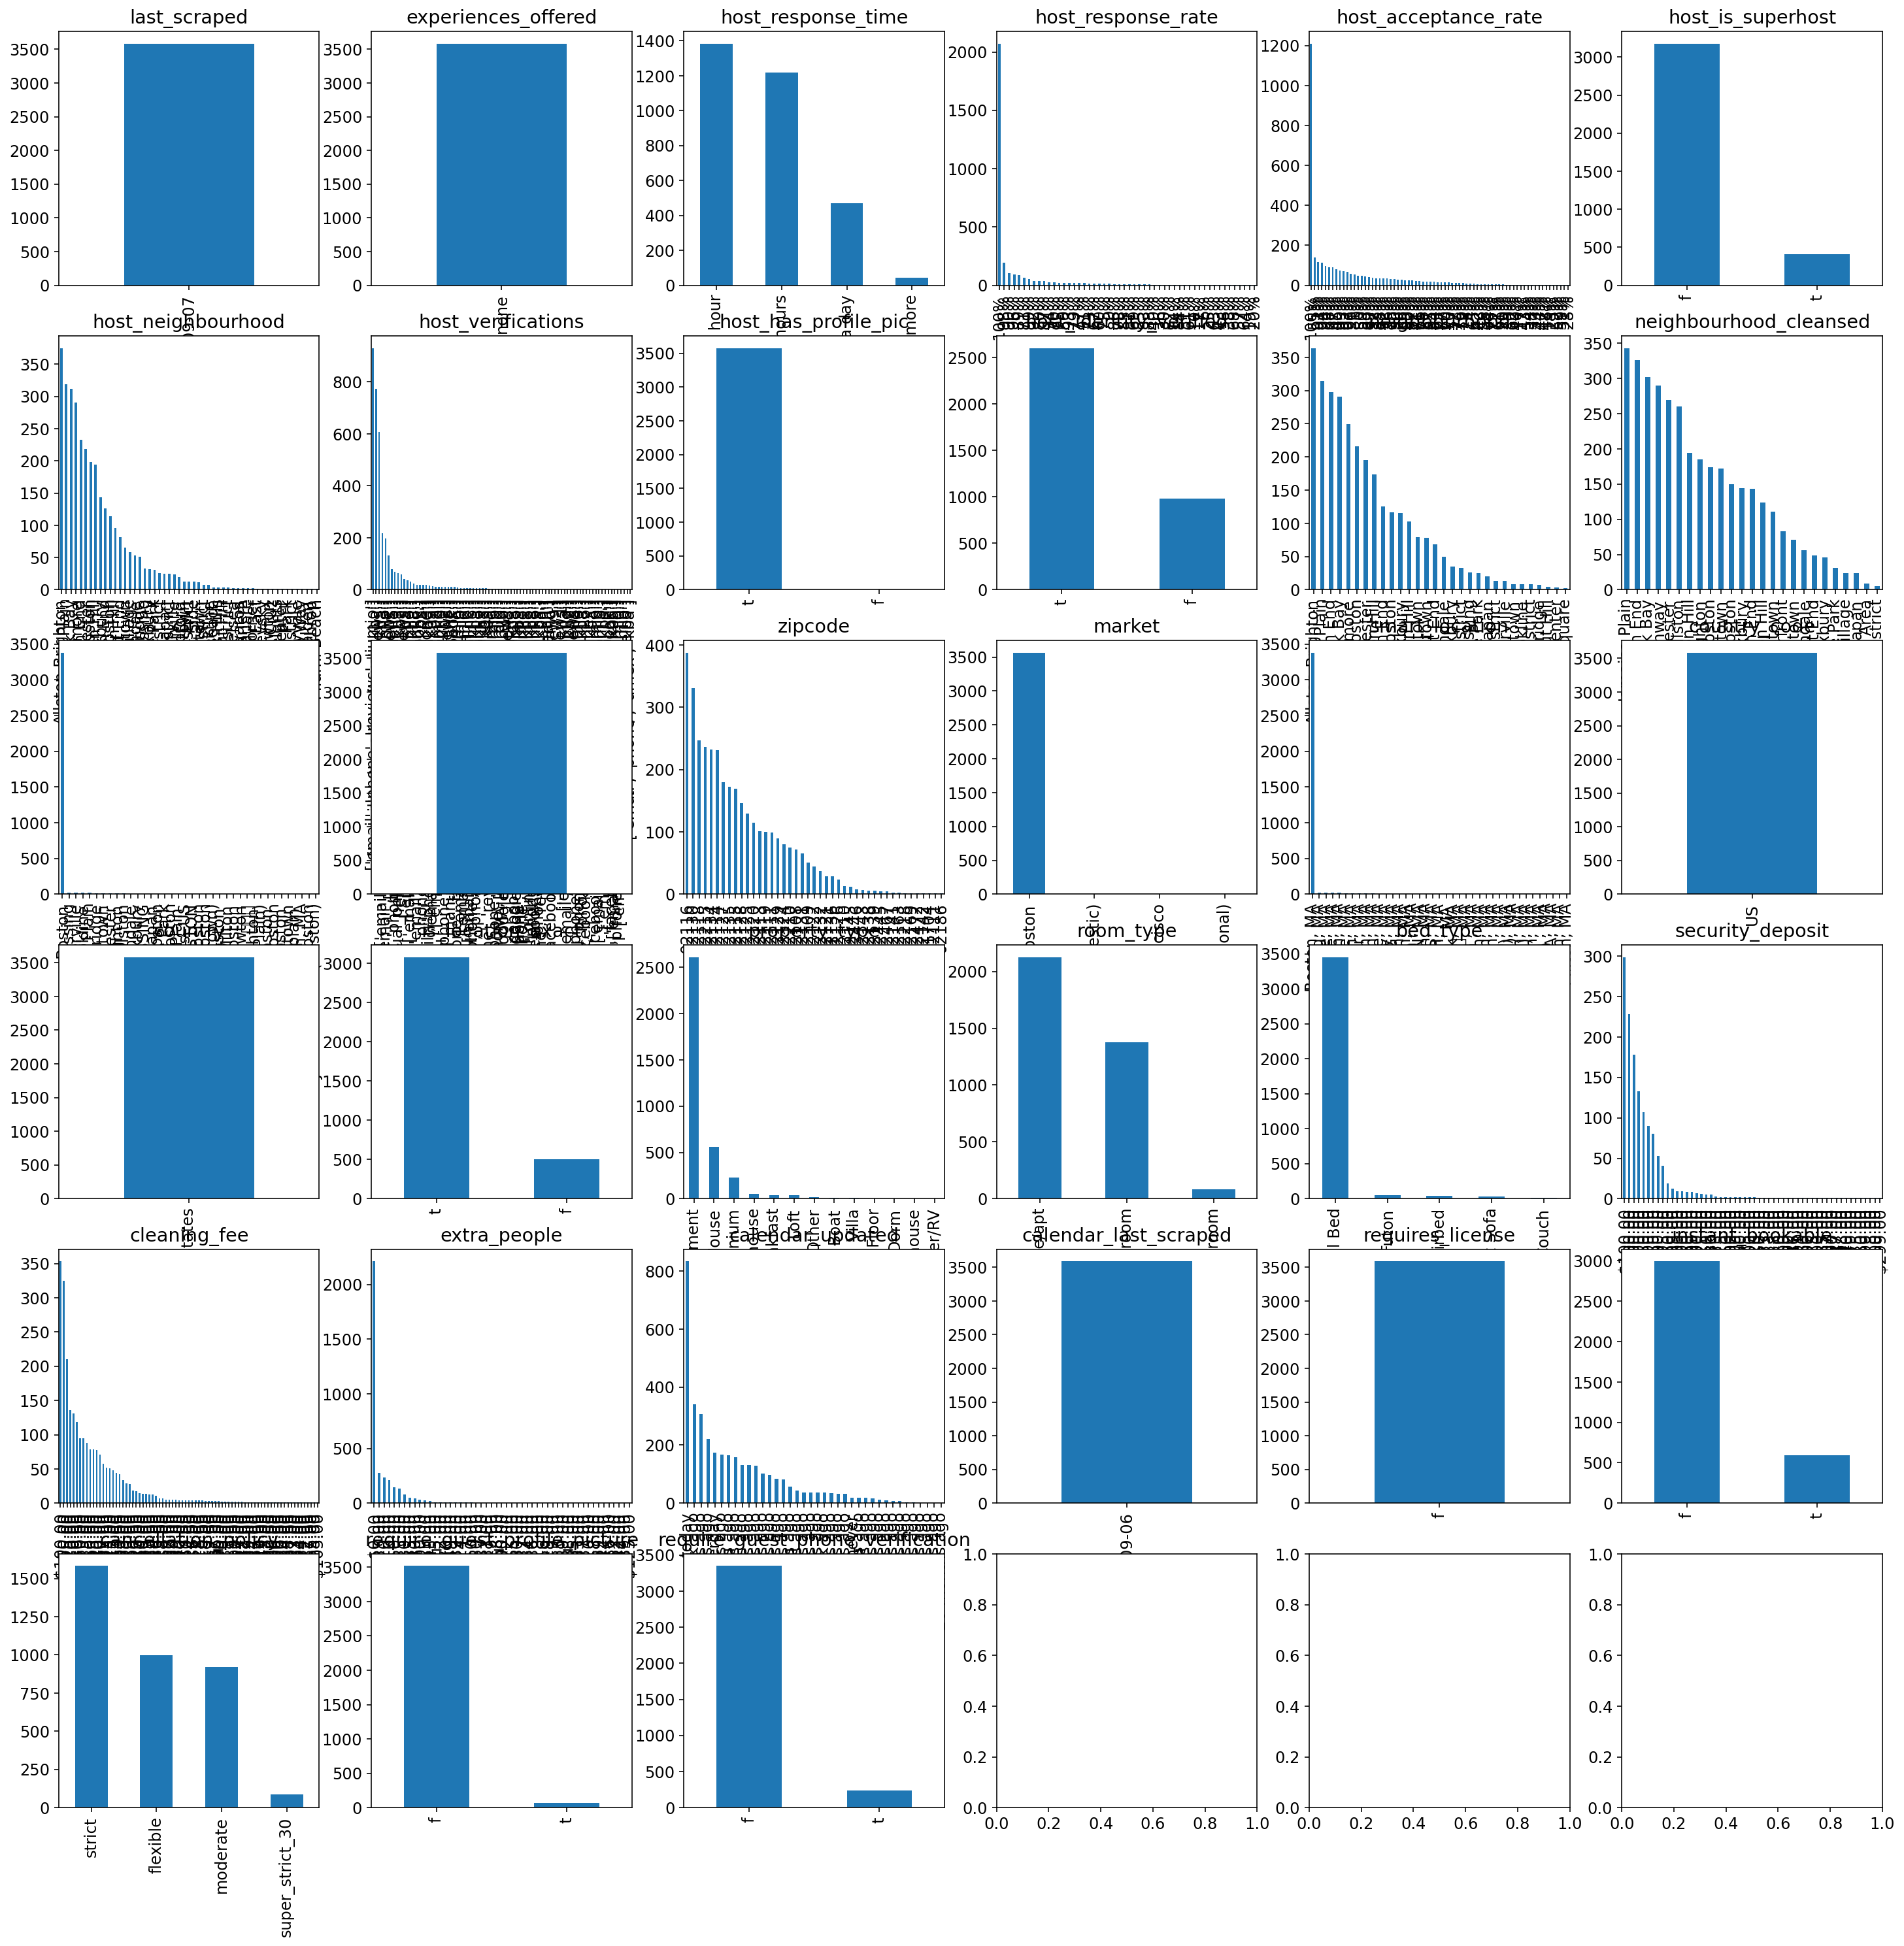

In [116]:
num_plots = 0
valid_features = []
for i, feature in enumerate(listings_df.select_dtypes(include='object').columns.to_list()):
  if len(listings_df[feature].unique()) < 100:
    valid_features.append(feature)
    num_plots += 1

fig, axes = plt.subplots(nrows=int(math.ceil(num_plots / 6)), ncols=6, figsize=(25, 25), squeeze=True)
for i, feature in enumerate(valid_features):
    listings_df[feature].value_counts().plot.bar(ax=axes[int(i/6)][int(i%6)])
    axes[int(i/6)][int(i%6)].set_title(feature)
fig.tight_layout()

#### 1.b) Data Quality Plan

In our data quality plan we go over every feature which we considered a candidate for removal or adjustment. We did not know that some pre-pre-processing was allowed before making the data quality plan. 

In our defense, we believe that we would have had to go through all features in this way regardless of whether or not we do it as a pre-pre-processing step or as part of our data quality plan (ie. in order to remove a feature during pre-pre-processing we would have look at that feature and its distribution, consider whether or not it's relevant, and justify its removal in our minds). We believe that it makes more sense to write down our reasons for any adjustments / removals in the data quality plan as a best practice, rather than just remove things without justification. That way we can later use the data quality plan as a complete reference of how we got from the raw data set to the processed data set used for training.

Also we did not remove any features that we deem intuitively irrelevant at this point. For example, we do not expect host_response_time to be very relevant to price, but we leave it in for now, noting that it will likely be removed when we use our feature selection method. This is because the whole point of our analysis is to use most sophisticated methods than simple intuition to justify which features to keep; even though it might seem to us that a feature is irrelvant to predicting the target feature, the data might say otherwise.

Feature Type | Feature | Data Quality Issue | Potential Handling Strategies
--- | --- | --- | ---
Continuous | scrape_id | Cardinality = 1 | Remove
Continuous | host_listings_count | Low Cardinality, Valid Positive Outlier | Leave as continuous but clamp at 3rd Quartile + 1.5 * IQR
Continuous | host_total_listings_count | Redundant | We can remove this feature because it is identical to host_listings_count
Continuous | neighbourhood_group_cleansed | Missing Values (100%) | This feature has no observed values. We will remove it
Continuous | accomodates | Low Cardinality | Only 14 different observed values. Will convert to categorical
Continuous | bathrooms | Missing Values, Low Cardinality | Convert to categorical, replace missing values with 'n/a' category
Continuous | bedrooms | Missing Values, Low Cardinality | Convert to categorical, replace missing values with 'n/a' category
Continuous | beds | Missing Values, Low Cardinality | Convert to categorical, replace missing values with 'n/a' category
Continuous | square_feet | Missing Values (98%) | This feature has very few observed values. We will remove it
Continuous | guests_included | Low Cardinality | Only 13 different observed values. Will convert to categorical
Continuous | minimum_nights | Low Cardinality, Invalid Positive Outlier | Leave as continuous but clamp at 3rd Quartile + 1.5 * IQR 
Continuous | maximum_nights | Invalid Positive Outlier | Likely invalid outlier. Clamp at 3rd Quartile + 1.5 * IQR 
Continuous | has_availability | Missing Values (100%) | This feature has no observed values. We will remove it
Continuous | number_of_reviews | Valid Positive Outlier | Clamp at 3rd Quartile + 1.5 * IQR 
Continuous | review_scores_rating | Missing Values | Missing ~20% of entries. We will fill in these entries using imputation by using median value
Continuous | review_scores_accuracy | Low Cardinality, Missing Values | Convert to categorical, fill in missing values using imputation by using median value
Continuous | review_scores_cleanliness | Low Cardinality, Missing Values | Convert to categorical, fill in missing values using imputation by using median value
Continuous | review_scores_checkin | Low Cardinality, Missing Values | Convert to categorical, fill in missing values using imputation by using median value
Continuous | review_scores_communication | Low Cardinality, Missing Values | Convert to categorical, fill in missing values using imputation by using median value
Continuous | review_scores_location | Low Cardinality, Missing Values | Convert to categorical, fill in missing values using imputation by using median value
Continuous | review_scores_value | Low Cardinality, Missing Values | Convert to categorical, fill in missing values using imputation by using median value
Continuous | license | Missing Values (100%) | This feature has no observed values. We will remove it
Continuous | jurisdiction_names | Missing Values (100%) | This feature has no observed values. We will remove it
Continuous | calculated_host_listings_count | Low Cardinality, Valid Positive Outlier | Leave as continuous but clamp at 3rd Quartile + 1.5 * IQR 
Continuous | reviews_per_month | Missing Values | Missing ~20% of entries. We will fill in these entries using imputation by using median value
Categorical |  listing_url | High Cardinality| Remove, as it doesn't add any additional information
Categorical | last_scraped | Low Cardinality | Remove, as is identical across all instances 
Categorical |  name | High Cardinality |  Can do sentiment analysis or other feature derivation here, but beyond scope of assignment. Remove
Categorical |  summary | High Cardinality | Can do sentiment analysis or other feature derivation here, but beyond scope of assignment. Remove
Categorical |  space | High Cardinality, Missing Values | Text based; remove
Categorical |  description | High Cardinality | Text based; remove
Categorical |  experiences_offered | Low Cardinality | Cardinality of 1; remove 
Categorical |  neighborhood_overview | High Cardinality, Missing Values | Text based; remove
Categorical |  notes | High Cardinality, Missing Values | Text based; remove
Categorical |  transit | High Cardinality, Missing Values | Text based; remove
Categorical |  access  | High Cardinality, Missing Values | Text based; remove
Categorical |  interaction | High Cardinality, Missing Values | Text based; remove
Categorical |  house_rules | High Cardinality, Missing Values | Text based; remove
Categorical |  thumbnail_url | High Cardinality, Missing Values | Text based; remove
Categorical |  medium_url | High Cardinality, Missing Values | Text based; remove
Categorical |  picture_url | High Cardinality | Text based; Remove
Categorical |  xl_picture_url | High Cardinality, Missing Values | Text based; remove
Categorical |  host_url | High Cardinality | Text based; remove
Categorical |  host_name | High Cardinality | Text based; remove
Categorical |  host_since | High Cardinality | Remove
Categorical |  host_about | High Cardinality, Missing Values | Text based; remove
Categorical |  host_response_time | Missing Values | Only missing about 13% of entries. Add a 5th possible value n/a
Categorical |  host_response_rate | High Cardinality, Missing Values | Convert percentage values to continuous. Impute missing values with mean
Categorical |  host_acceptance_rate | High Cardinality, Missing Values | Convert percentage values to continuous. Impute missing values with mean
Categorical | host_thumbnail_url.|High Cardinality | Remove
Categorical | host_picture_url| High Cardinality| Remove
Categorical | host_neighbourhood | High Cardinality, Missing Values | Remove
Categorical | host_verifications| High Cardinality, Missing Values | Remove
Categorical | host_has_profile_pic| High Percentage Mode | Remove
Categorical | neighbourhood	| Missing Values| Missing values are present in neighbourhood_cleansed; remove
Categorical | city	| High Percentage Mode | Remove
Categorical | state|Low Cardinality| Remove
Categorical | zipcode	| Missing Values | Repalce missing values with n/a
Categorical | market | High Percentage Mode | Remove
Categorical | smart_location | High Percentage Mode | Remove
Categorical | country_code| Low Cardinality | Remove
Categorical | country	| Low Cardinality | Remove
Categorical | property_type| Missing Values| Repalce missing values with n/a
Categorical | bed_type | High Percentage Mode | Remove
Categorical | amenities| High Cardinality | Text based; remove
Categorical | price| Missing Values, High Cardinality | Remove entries with missing values, as price is our target variable. Convert to continous
Categorical | weekly_price| High Cardinality | Convert to continous, continous features misrepresented as categorical 
Categorical | monthly_price| High Cardinality| Convert to continous,continous features misrepresented as categorical 
Categorical | security_deposit|  High Cardinality|Convert to continous, continous features misrepresented as categorical 
Categorical | cleaning_fee|  High Cardinality|Convert to continous, continous features misrepresented as categorical 
Categorical | extra_people| High Cardinality |Convert to continous, continous features misrepresented as categorical 
Categorical | calendar_last_scraped| Low Cardinaltiy | Remove
Categorical | first_review| High Cardinality, Missing Values| High cardinality and lack of relevance to target variable. Remove
Categorical | last_review	| High Cardinality, Missing Values|  High cardinality and lack of relevance to target variable. Remove
Categorical | requires_license	| Low Cardinality| Remove, all instances the same 
Categorical | require_guest_profile_picture | High Percentage Mode | Remove
Categorical | require_guest_phone_verification | High Percentage Mode | Remove

#### 1.c) Preprocessing Data

In [117]:
final_listings_df = listings_df.copy()
drop_features = ['host_total_listings_count']

# -------------- Continuous Features

# Remove features with more than 60% missing, cardinality = 1
for feature in listings_df.columns:
  per_missing = listings_df[feature].isna().sum() / len(listings_df[feature]) * 100
  cardinality = listings_df[feature].nunique()
  if per_missing > 60 or cardinality == 1:
    drop_features.append(feature)
final_listings_df = final_listings_df.drop(drop_features, axis=1)

# Clamping features with outliers
clamp_features = ['host_listings_count', 'maximum_nights', 'number_of_reviews',
                  'minimum_nights', 'calculated_host_listings_count']
for feature in clamp_features:
  q1 = final_listings_df[feature].quantile(0.25)
  q3 = final_listings_df[feature].quantile(0.75)
  iqr = q3 - q1
  clamp_val = q3 + (1.5 * iqr)
  final_listings_df[feature] = final_listings_df[feature].clip(upper=clamp_val)
  
# Imputating features with missing values
impute_features = ['review_scores_rating', 'review_scores_accuracy', 
                   'review_scores_cleanliness', 'review_scores_checkin',
                   'review_scores_communication', 'review_scores_location',
                   'review_scores_value', 'reviews_per_month']
for feature in impute_features:
  median = final_listings_df[feature].median()
  final_listings_df[feature] = final_listings_df[feature].fillna(median)

# Convert categorical price and percentage features to continuous
price_features = ['price', 'cleaning_fee', 'extra_people', 'host_response_rate',
                  'host_acceptance_rate']
for feature in price_features:
  final_listings_df[feature] = final_listings_df[feature].replace({'\$':''}, regex = True)
  final_listings_df[feature] = final_listings_df[feature].replace({'\%':''}, regex = True)
  final_listings_df[feature] = final_listings_df[feature].apply(pd.to_numeric, errors='coerce')
  final_listings_df[feature] = final_listings_df[feature].fillna(median)
  # Fill in missing cleaning_fee data with zeros
  if feature == 'cleaning_fee':
    final_listings_df[feature] = final_listings_df[feature].fillna(0)
  # Remove rows with no price value
  if feature == 'price':
    final_listings_df = final_listings_df[final_listings_df[feature].notna()]

# -------------- Categorical Features

# Convert continuous features with < 20 cardinality to categorical
continuous_features = final_listings_df.select_dtypes('number').columns.tolist()
categorical_features = []
drop_features = []
for feature in continuous_features:
  cardinality = final_listings_df[feature].nunique()
  if cardinality < 20:
    drop_features.append(feature)
    categorical_features.append(feature)
continuous_features = [x for x in continuous_features if x not in drop_features]

# Remove text based / high cardinality features and high mode features
categorical_features += final_listings_df.select_dtypes(include='object').columns.to_list()
drop_features = ['neighbourhood']
for feature in categorical_features:
  cardinality = final_listings_df[feature].nunique()
  values = final_listings_df[feature].value_counts()
  mode = values.index[0]
  modecount = values.loc[mode]
  if cardinality > 30 or modecount > 3200:
    drop_features.append(feature)
categorical_features = [x for x in categorical_features if x not in drop_features]
final_listings_df = final_listings_df.drop(drop_features, axis=1)

# For features with small miss percentages, creating "n/a" category
miss_features = ['bathrooms', 'bedrooms', 'beds', 'host_response_time',
                 'property_type']
for feature in miss_features:
  final_listings_df[feature] = final_listings_df[feature].fillna("n/a")

**Adjusted Continuous Features**

In [118]:
with pd.option_context('display.float_format', '{:.2f}'.format):
  display(buildContinuousFeaturesReport(continuous_features, final_listings_df))

Count  Miss %  Card.  ...     3rd Qrt         Max   Std. Dev.
id                     3585    0.00   3585  ... 12789527.00 14933461.00  4500786.86
host_id                3585    0.00   2181  ... 36221474.00 93854106.00 22927809.87
host_response_rate     3585    0.00     53  ...      100.00      100.00       33.78
host_acceptance_rate   3585    0.00     73  ...      100.00      100.00       34.62
latitude               3585    0.00   3585  ...       42.35       42.39        0.02
longitude              3585    0.00   3585  ...      -71.06      -71.00        0.03
price                  3585    0.00    315  ...      220.00      999.00      111.91
cleaning_fee           3585    0.00     80  ...       80.00      300.00       52.75
extra_people           3585    0.00     51  ...       20.00      200.00       19.14
maximum_nights         3585    0.00     84  ...     1125.00     2265.00      473.31
availability_30        3585    0.00     31  ...       15.00       30.00       10.44
availability_60        3585    0.00     61  ...       40.00       60.00       21.86
availability_90        3585    0.00     91  ...       68.00       90.00       33.16
availability_365       3585    0.00    348  ...      325.00      365.00      142.14
number_of_reviews      3585    0.00     52  ...       21.00       51.00       17.10
review_scores_rating   3585    0.00     48  ...       97.00      100.00        8.43
reviews_per_month      3585    0.00    644  ...        2.13       19.15        1.91

[17 rows x 10 columns]

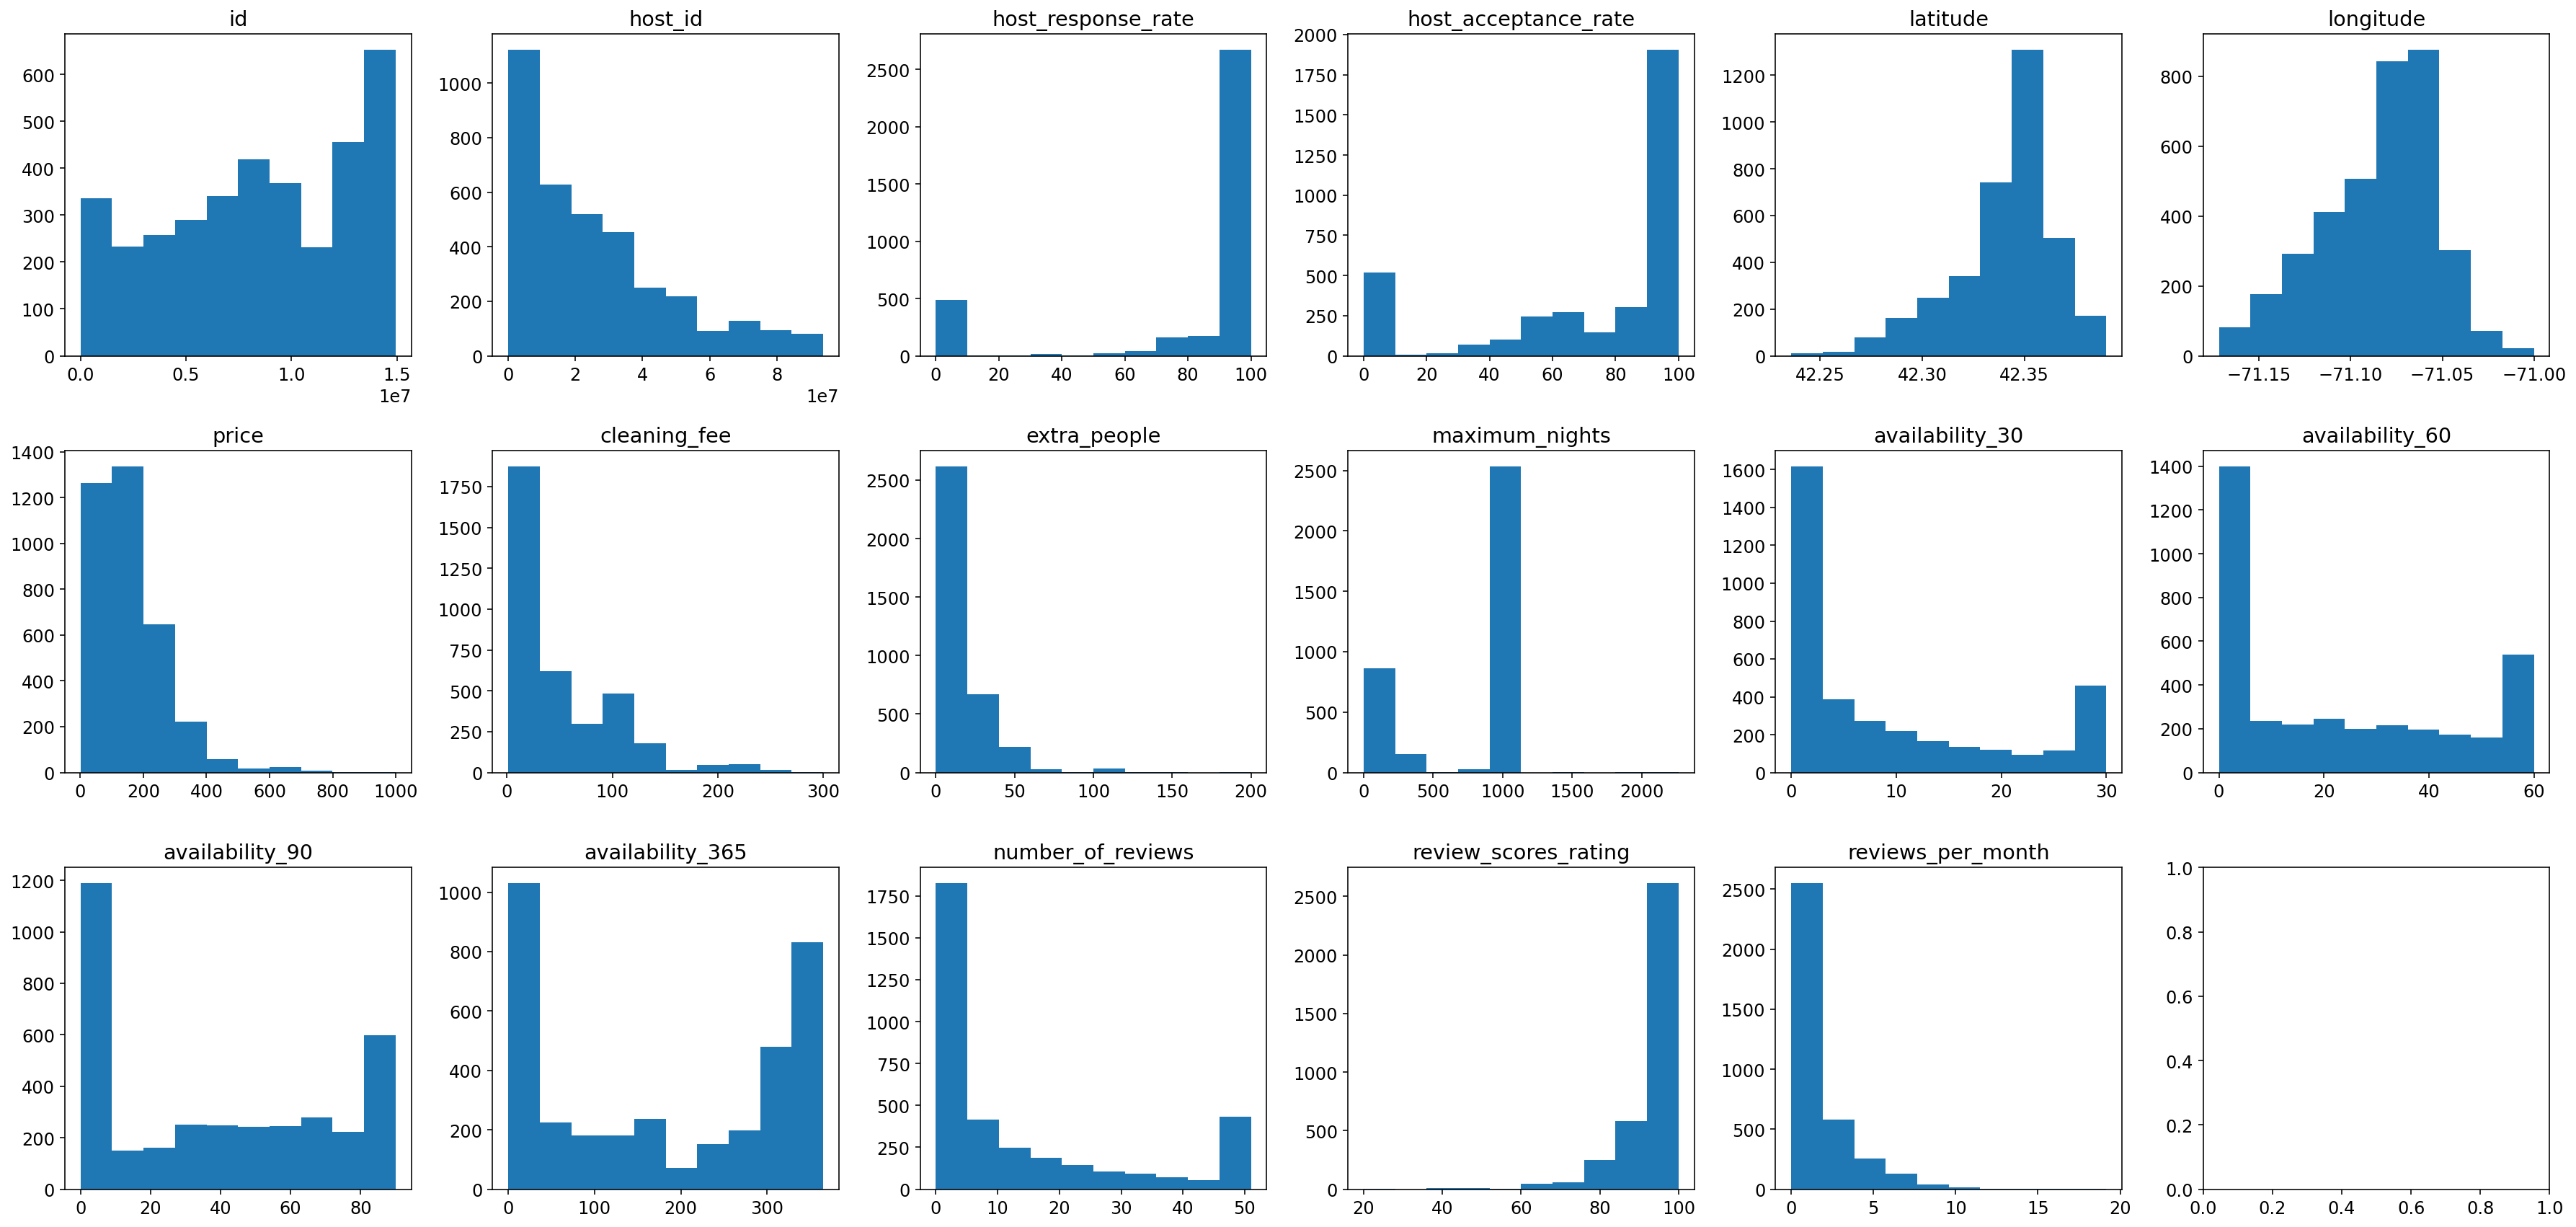

In [119]:
fig, axes = plt.subplots(nrows=int(math.ceil(len(continuous_features) / 6)), ncols=6, figsize=(25, 12), squeeze=False)

for i, feature in enumerate(continuous_features):
    axes[int(i/6)][int(i%6)].hist(final_listings_df[feature])
    axes[int(i/6)][int(i%6)].set_title(feature)
fig.tight_layout()

**Adjusted Categorical Features**

In [120]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None), pd.option_context('display.float_format', '{:.2f}'.format):
  display(buildCategoricalFeaturesReport(categorical_features, final_listings_df))

Count  Miss %  Card.             Mode  \
host_listings_count              3585    0.00     17                1   
accommodates                     3585    0.00     14                2   
bathrooms                        3585    0.00     13             1.00   
bedrooms                         3585    0.00      7             1.00   
beds                             3585    0.00     12             1.00   
guests_included                  3585    0.00     13                1   
minimum_nights                   3585    0.00      6                1   
review_scores_accuracy           3585    0.00      8            10.00   
review_scores_cleanliness        3585    0.00      9            10.00   
review_scores_checkin            3585    0.00      8            10.00   
review_scores_communication      3585    0.00      7            10.00   
review_scores_location           3585    0.00      9            10.00   
review_scores_value              3585    0.00      9             9.00   
calculated_host_listings_count   3585    0.00     14             1.00   
host_response_time               3585    0.00      5   within an hour   
host_is_superhost                3585    0.00      2                f   
host_identity_verified           3585    0.00      2                t   
neighbourhood_cleansed           3585    0.00     25    Jamaica Plain   
is_location_exact                3585    0.00      2                t   
property_type                    3585    0.00     14        Apartment   
room_type                        3585    0.00      3  Entire home/apt   
instant_bookable                 3585    0.00      2                f   
cancellation_policy              3585    0.00      4           strict   

                                Mode Freq  Mode %            2nd Mode  \
host_listings_count                  1616   45.08                  16   
accommodates                         1483   41.37                   4   
bathrooms                            2751   76.74                2.00   
bedrooms                             2379   66.36                2.00   
beds                                 2165   60.39                2.00   
guests_included                      2607   72.72                   2   
minimum_nights                       1426   39.78                   2   
review_scores_accuracy               2503   69.82                9.00   
review_scores_cleanliness            2361   65.86                9.00   
review_scores_checkin                2886   80.50                9.00   
review_scores_communication          2878   80.28                9.00   
review_scores_location               2442   68.12                9.00   
review_scores_value                  1951   54.42               10.00   
calculated_host_listings_count       1768   49.32               13.50   
host_response_time                   1384   38.61  within a few hours   
host_is_superhost                    3178   88.65                   t   
host_identity_verified               2603   72.61                   f   
neighbourhood_cleansed                343    9.57           South End   
is_location_exact                    3080   85.91                   f   
property_type                        2612   72.86               House   
room_type                            2127   59.33        Private room   
instant_bookable                     2991   83.43                   t   
cancellation_policy                  1582   44.13            flexible   

                                2nd Mode Freq  2nd Mode %  
host_listings_count                       665       18.55  
accommodates                              650       18.13  
bathrooms                                 478       13.33  
bedrooms                                  693       19.33  
beds                                      953       26.58  
guests_included                           554       15.45  
minimum_nights                            998       27.84  
review_scores_accuracy                    793 

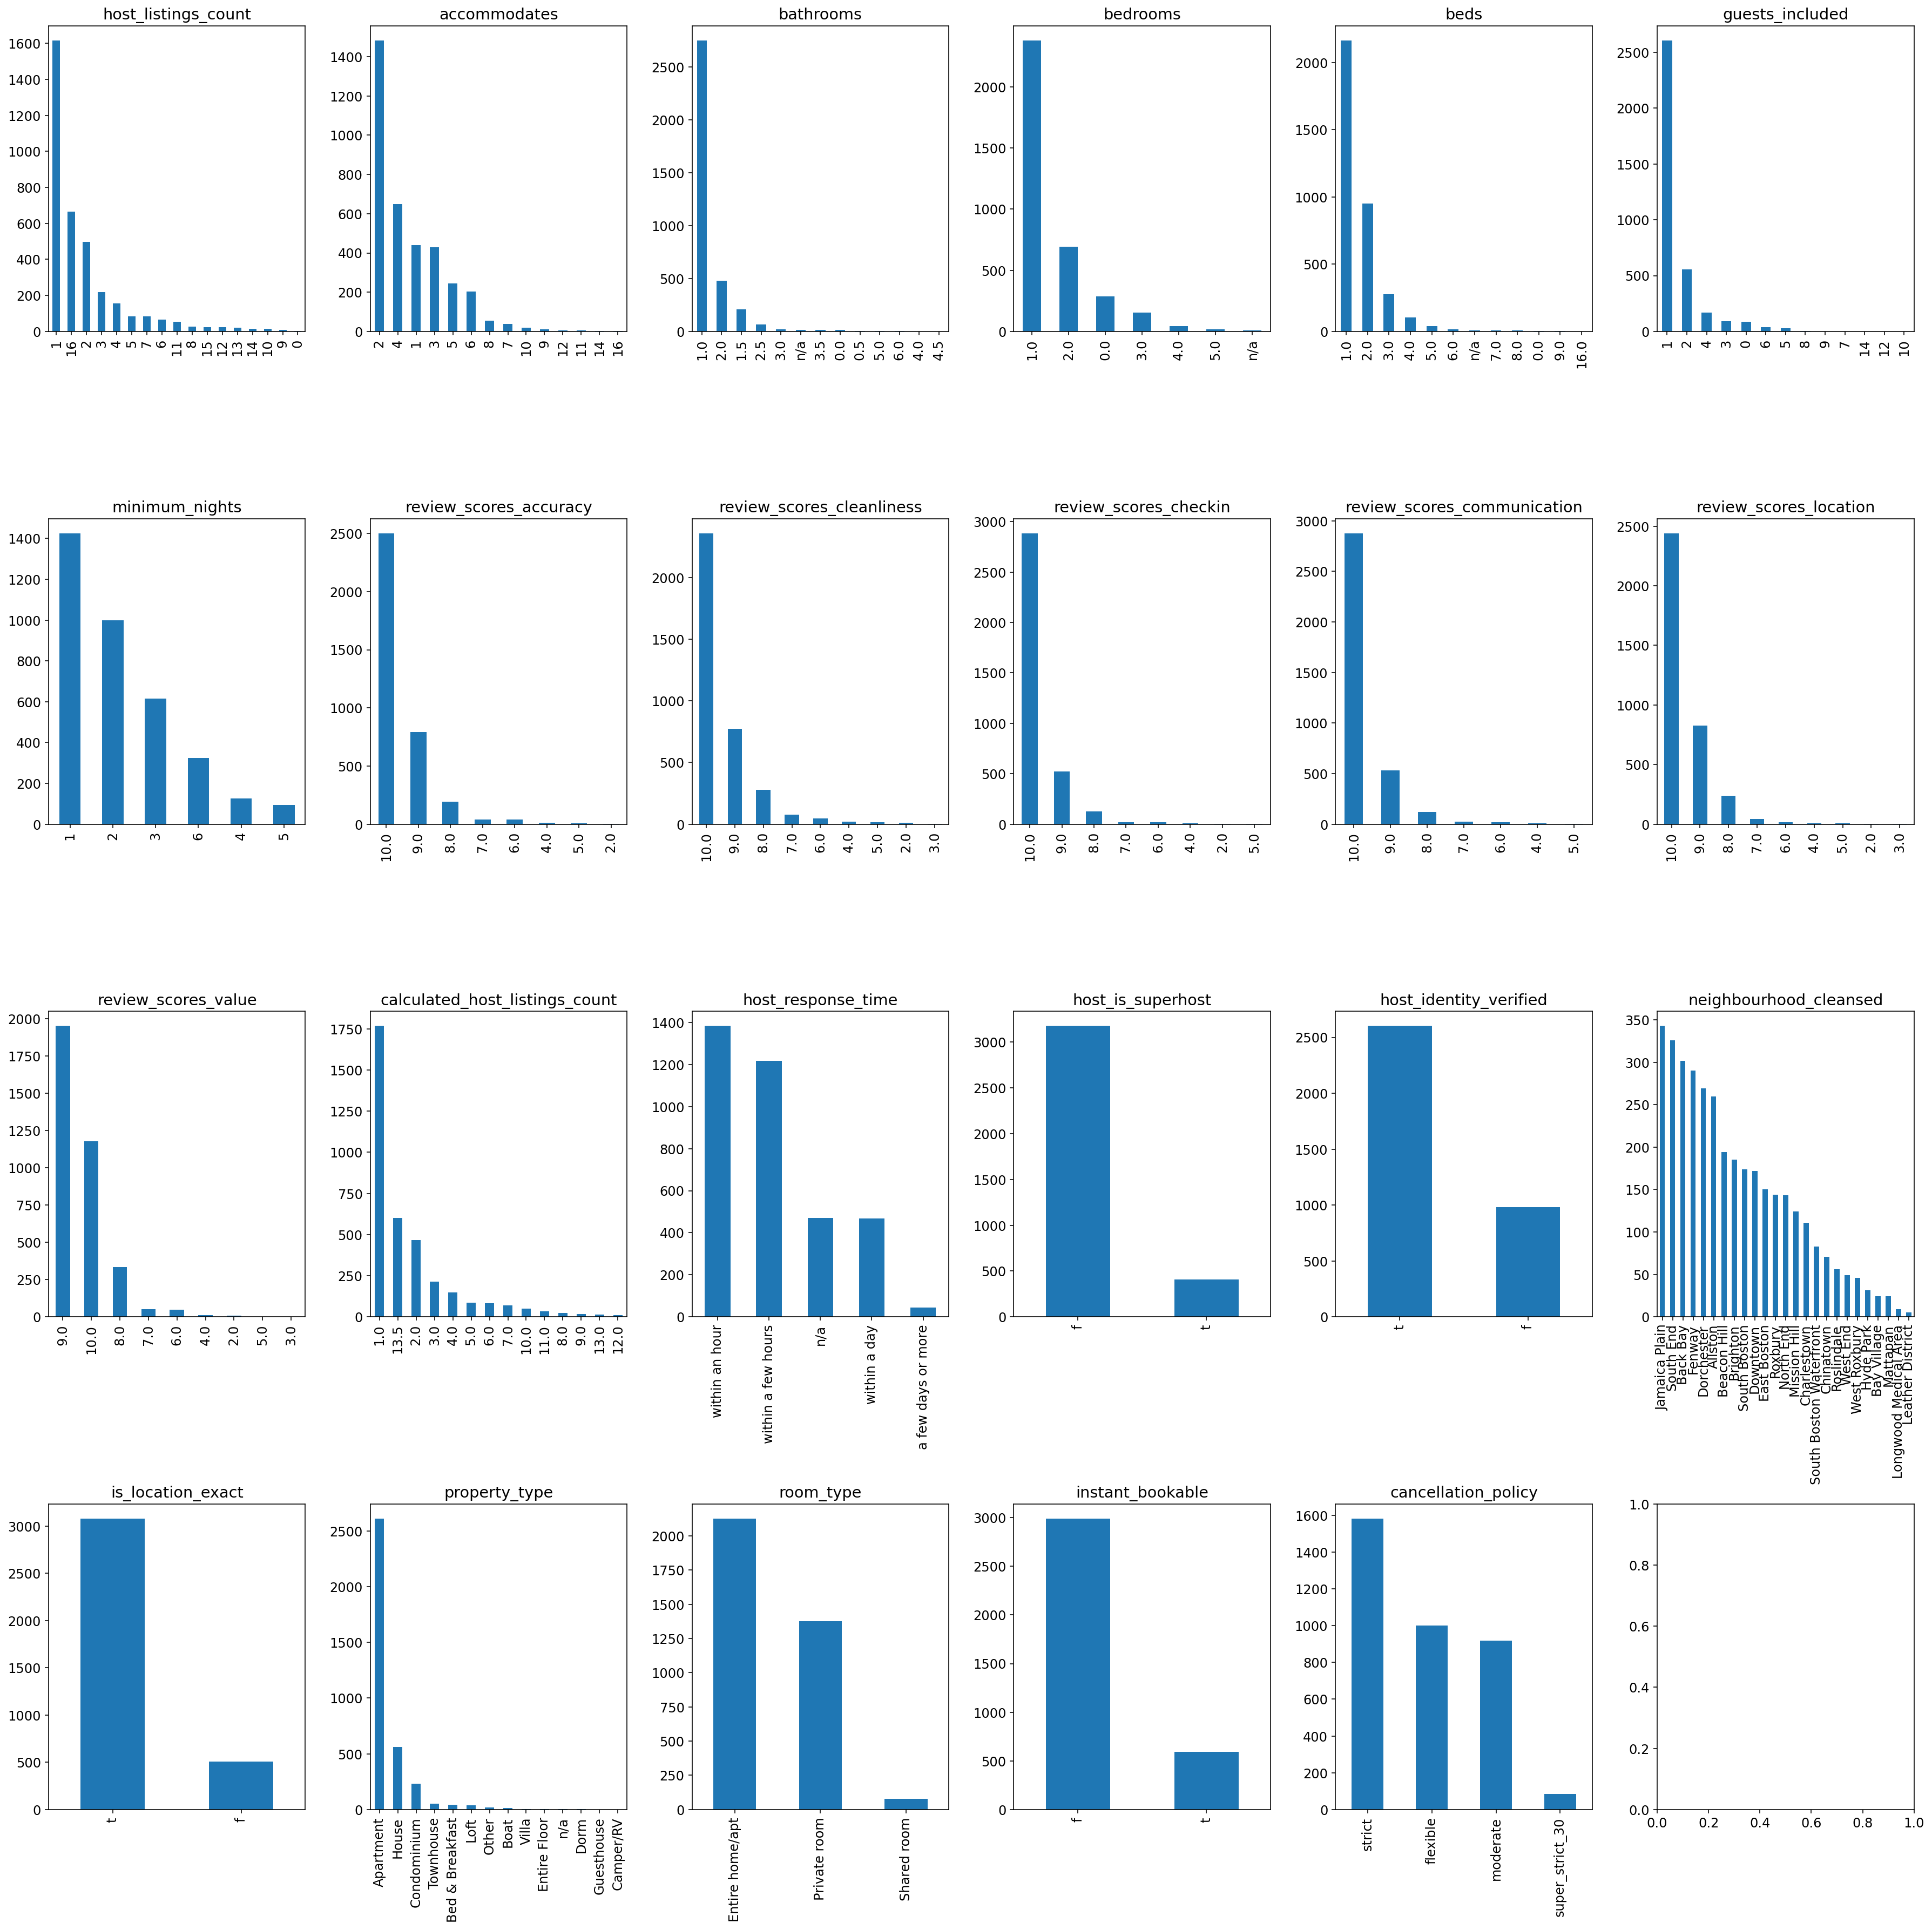

In [121]:
fig, axes = plt.subplots(nrows=int(math.ceil(len(categorical_features) / 6)), ncols=6, figsize=(25, 25), squeeze=True)
for i, feature in enumerate(categorical_features):
    final_listings_df[feature].value_counts().plot.bar(ax=axes[int(i/6)][int(i%6)])
    axes[int(i/6)][int(i%6)].set_title(feature)
fig.tight_layout()

#### 1.d) Questions

In [122]:
max_rating = 0
max_neighbourhood = ""
for neighbourhood in final_listings_df['neighbourhood_cleansed'].unique():
  curr_df = final_listings_df[final_listings_df['neighbourhood_cleansed'] == neighbourhood]
  curr_avg_rating = curr_df['review_scores_rating'].mean(0)
  print("{}\n   Avg Rating: {}, \tNum Listings: {}".format(neighbourhood, 
                                                         round(curr_avg_rating, 3),
                                                         curr_df.shape[0]))
  if curr_avg_rating > max_rating:
    max_rating = curr_avg_rating
    max_neighbourhood = neighbourhood

print("\n========= Highest average rating: {}".format(max_neighbourhood))

Roslindale
   Avg Rating: 95.232, 	Num Listings: 56
Jamaica Plain
   Avg Rating: 94.137, 	Num Listings: 343
Mission Hill
   Avg Rating: 89.831, 	Num Listings: 124
Longwood Medical Area
   Avg Rating: 94.0, 	Num Listings: 9
Bay Village
   Avg Rating: 93.333, 	Num Listings: 24
Leather District
   Avg Rating: 96.6, 	Num Listings: 5
Chinatown
   Avg Rating: 92.915, 	Num Listings: 71
North End
   Avg Rating: 93.769, 	Num Listings: 143
Roxbury
   Avg Rating: 90.59, 	Num Listings: 144
South End
   Avg Rating: 93.396, 	Num Listings: 326
Back Bay
   Avg Rating: 92.063, 	Num Listings: 302
East Boston
   Avg Rating: 90.62, 	Num Listings: 150
Charlestown
   Avg Rating: 93.793, 	Num Listings: 111
West End
   Avg Rating: 91.98, 	Num Listings: 49
Beacon Hill
   Avg Rating: 93.459, 	Num Listings: 194
Downtown
   Avg Rating: 92.924, 	Num Listings: 172
Fenway
   Avg Rating: 91.045, 	Num Listings: 290
Brighton
   Avg Rating: 91.746, 	Num Listings: 185
West Roxbury
   Avg Rating: 94.87, 	Num Listings: 46


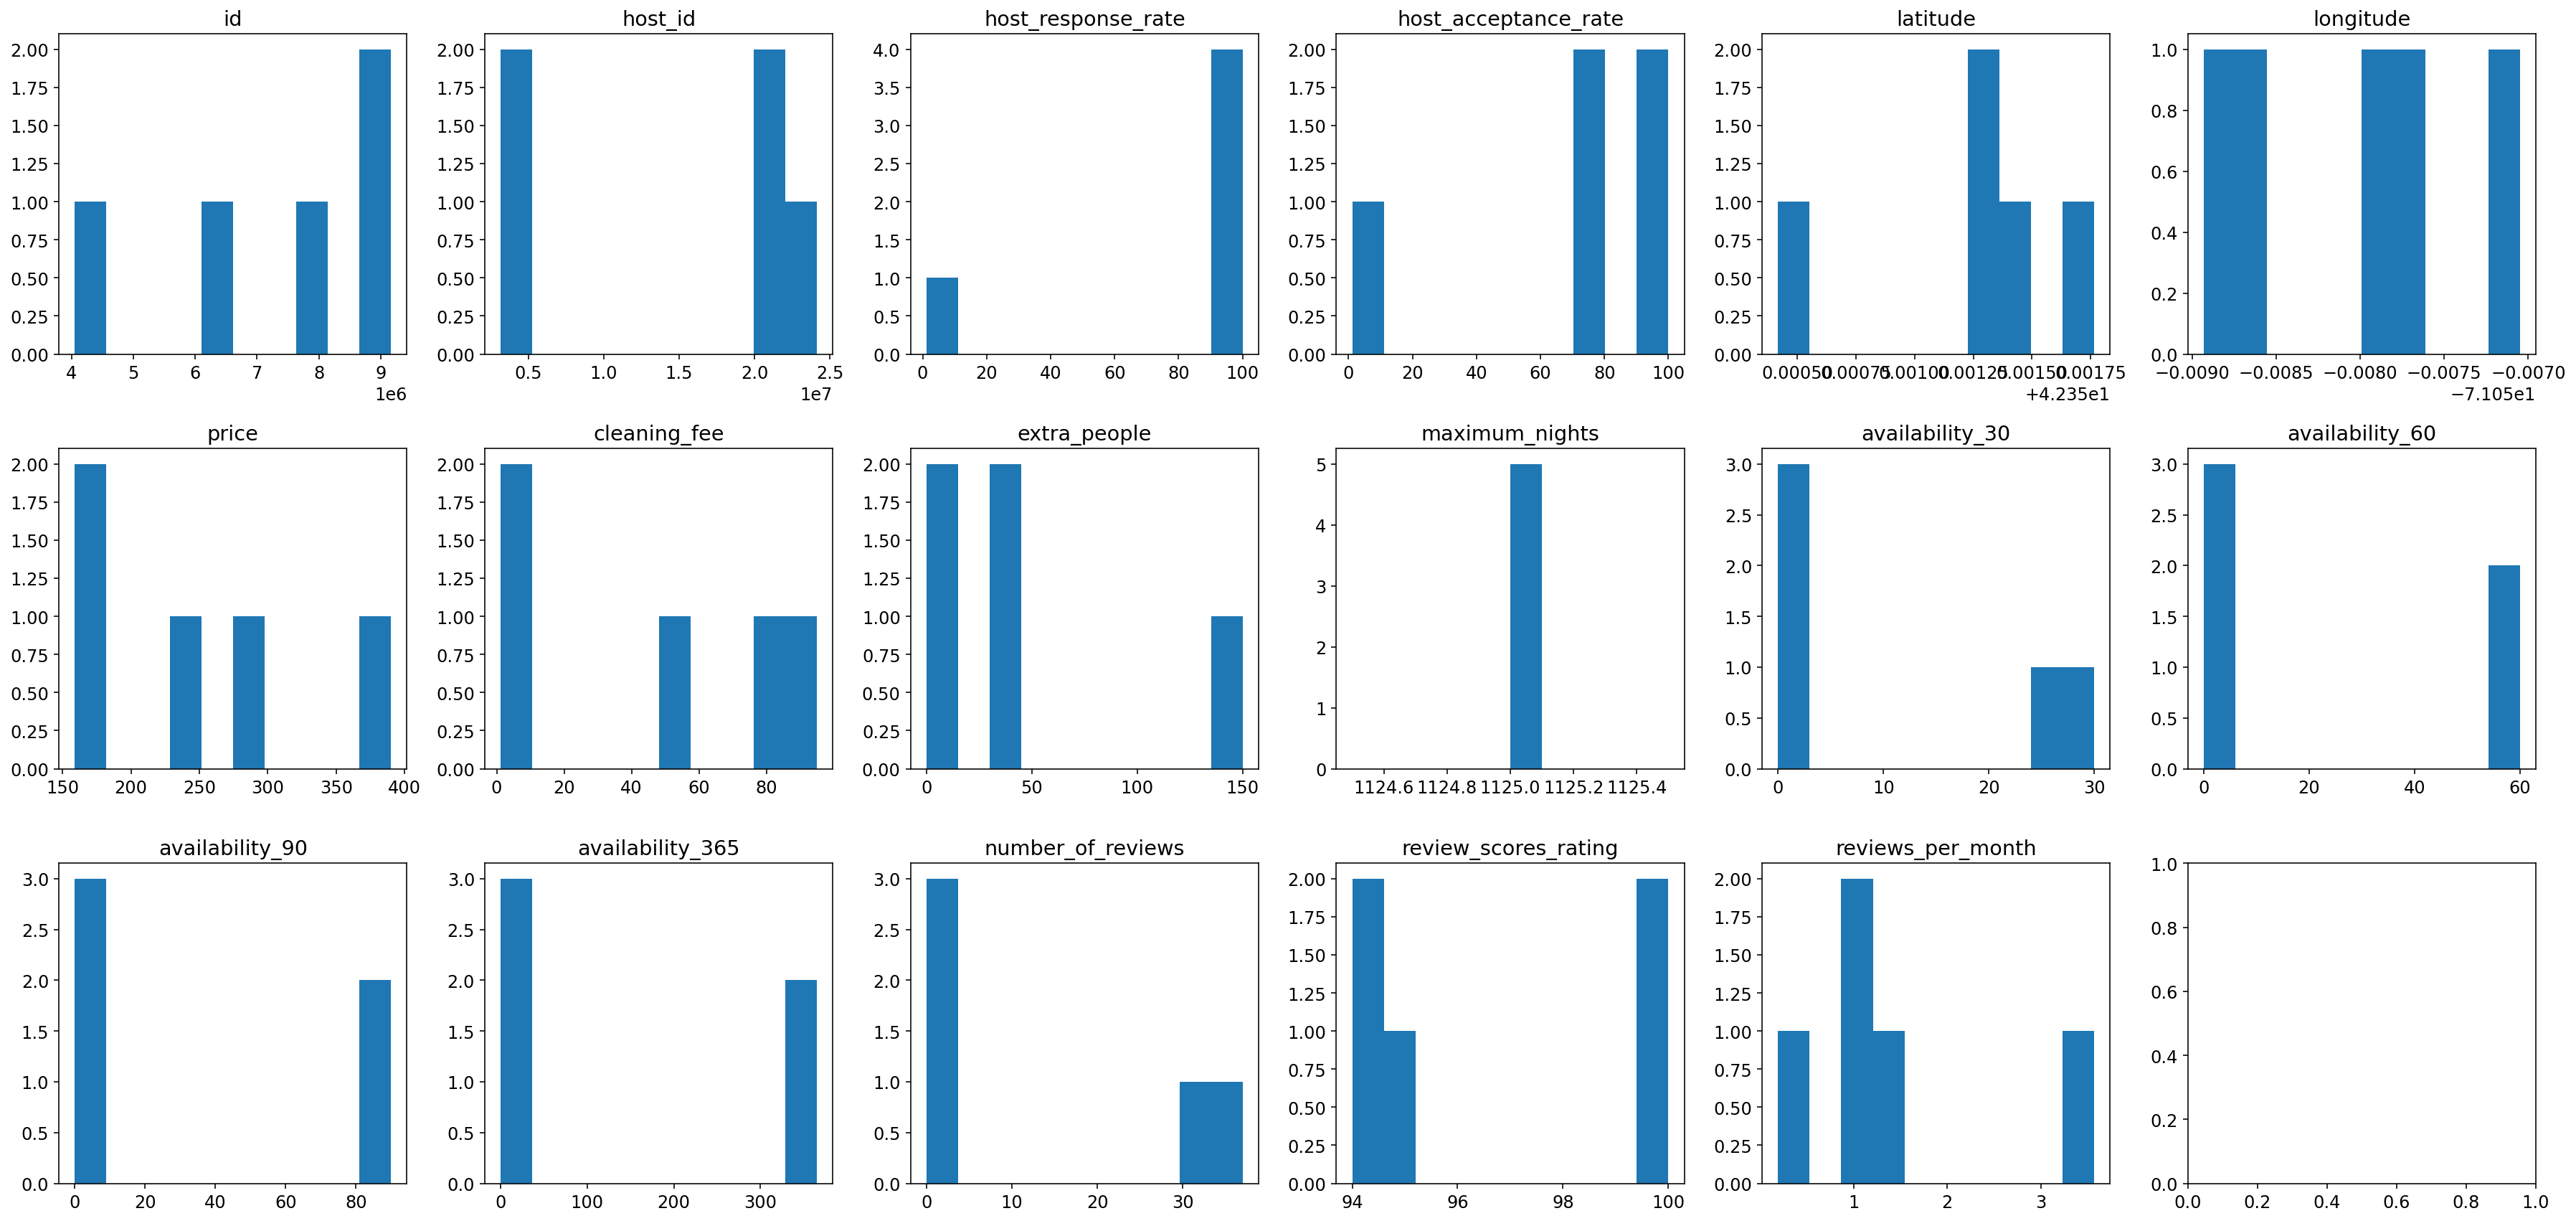

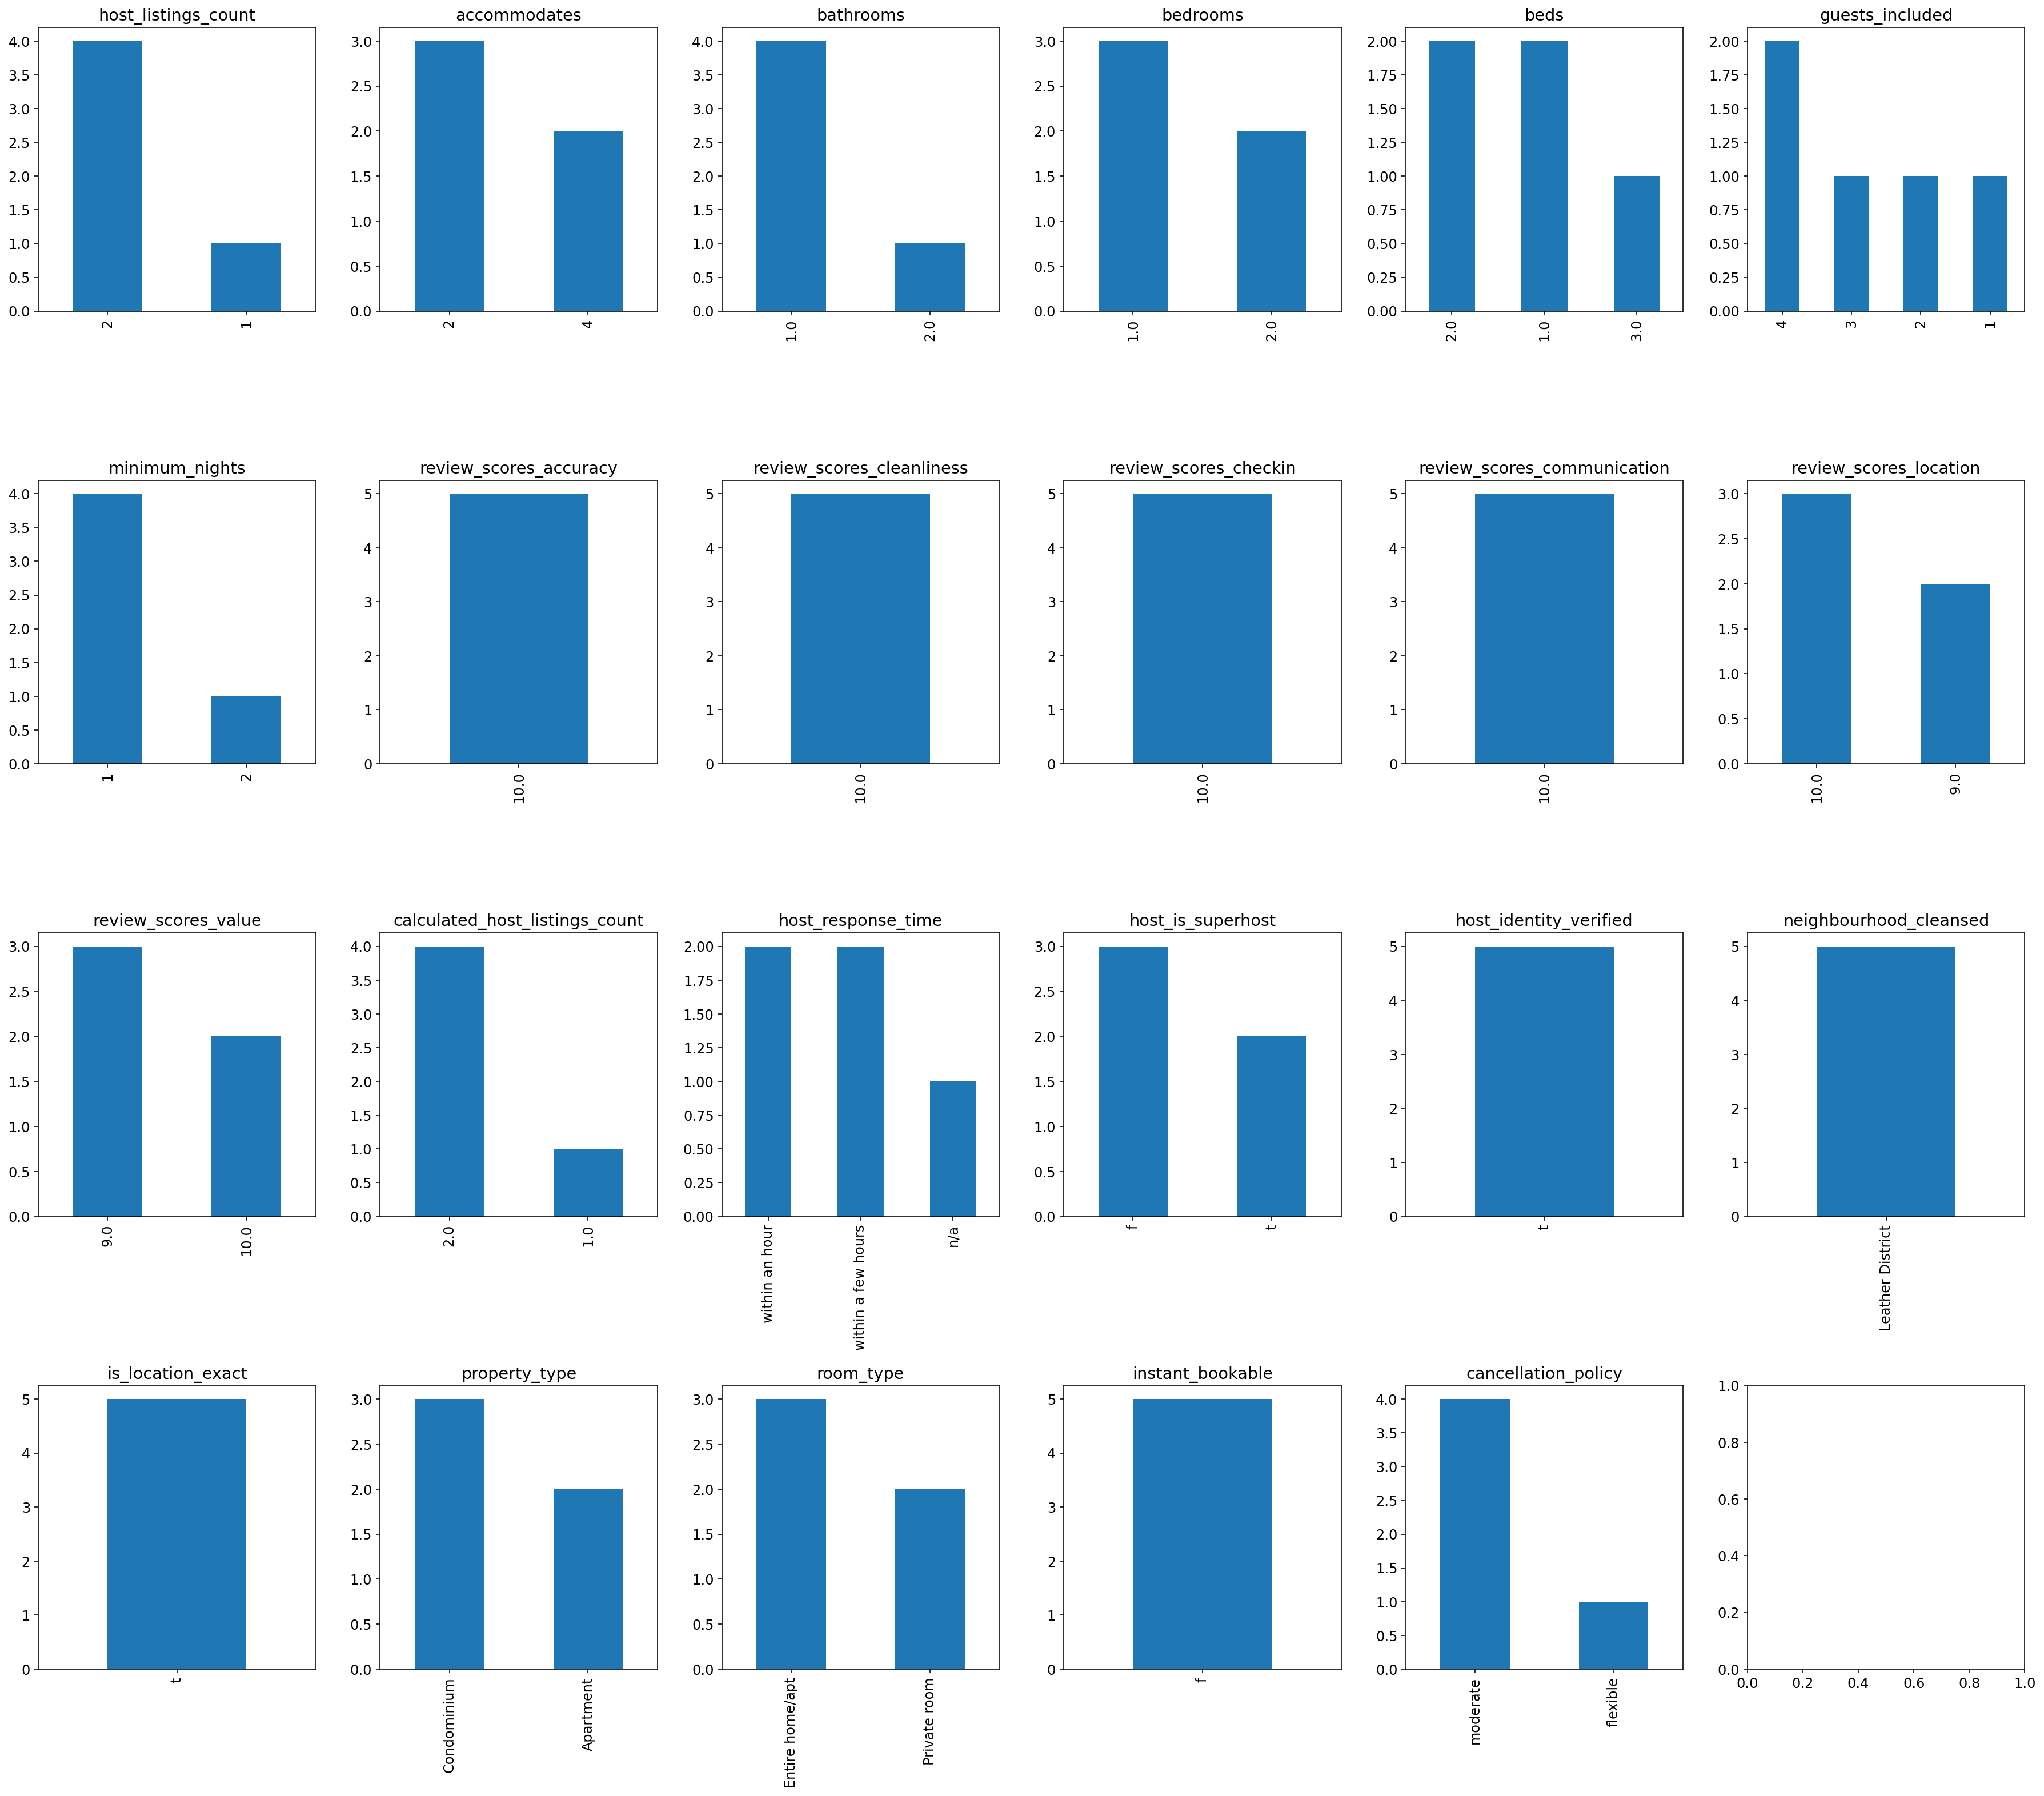

In [123]:
leather_df = final_listings_df[final_listings_df['neighbourhood_cleansed'] == 'Leather District']

fig, axes = plt.subplots(nrows=int(math.ceil(len(continuous_features) / 6)), ncols=6, figsize=(25, 12), squeeze=False)

for i, feature in enumerate(continuous_features):
    axes[int(i/6)][int(i%6)].hist(leather_df[feature])
    axes[int(i/6)][int(i%6)].set_title(feature)
fig.tight_layout()

fig, axes = plt.subplots(nrows=int(math.ceil(len(categorical_features) / 6)), ncols=6, figsize=(25, 22), squeeze=True)
for i, feature in enumerate(categorical_features):
    leather_df[feature].value_counts().plot.bar(ax=axes[int(i/6)][int(i%6)])
    axes[int(i/6)][int(i%6)].set_title(feature)
fig.tight_layout()

The first and most obvious characteristic of this neighbourhood is that there are relatively few listings located here, which is likely why its average rating is so high (two of the ratings are 100%, the other three mid 90s). We can see that the listings are only for condos and apartments, typically with one bedroom and one bathroom. With respect to price, two of the five listings fall within the \$100 - \$200 range, two fall in the \$200 - \$300 range, and one falls in the \$300 - \$400 range. All are instantly bookable and most offer a moderate cancellation policy. Two of the five listings are given by superhosts, which is unusual because we saw above that across Boston as a whole only 11% of hosts are superhosts.

## 2. Spatial Data

In [ ]:
!pip install geopandas

     |████████████████████████████████| 972kB 9.0MB/s 
     |████████████████████████████████| 14.8MB 300kB/s 
     |████████████████████████████████| 6.5MB 42.0MB/s 


In [ ]:
files.upload()
! unzip Boston_Neighborhoods-shp.zip -d boston_spatial_data
! ls boston_spatial_data

Saving Boston_Neighborhoods-shp.zip to Boston_Neighborhoods-shp.zip
Archive:  Boston_Neighborhoods-shp.zip
  inflating: boston_spatial_data/Boston_Neighborhoods.prj  
 extracting: boston_spatial_data/Boston_Neighborhoods.cpg  
  inflating: boston_spatial_data/Boston_Neighborhoods.shp  
  inflating: boston_spatial_data/Boston_Neighborhoods.dbf  
  inflating: boston_spatial_data/Boston_Neighborhoods.shx  
Boston_Neighborhoods.cpg  Boston_Neighborhoods.prj  Boston_Neighborhoods.shx
Boston_Neighborhoods.dbf  Boston_Neighborhoods.shp


/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/geopandas/base.py:39: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")
/usr/local/lib/python3.6/dist-packages/geopandas/base.py:39: UserWarning

-71.13246485826544
42.235941807706816
-71.07131447263393
42.35713132783332


/usr/local/lib/python3.6/dist-packages/geopandas/base.py:39: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


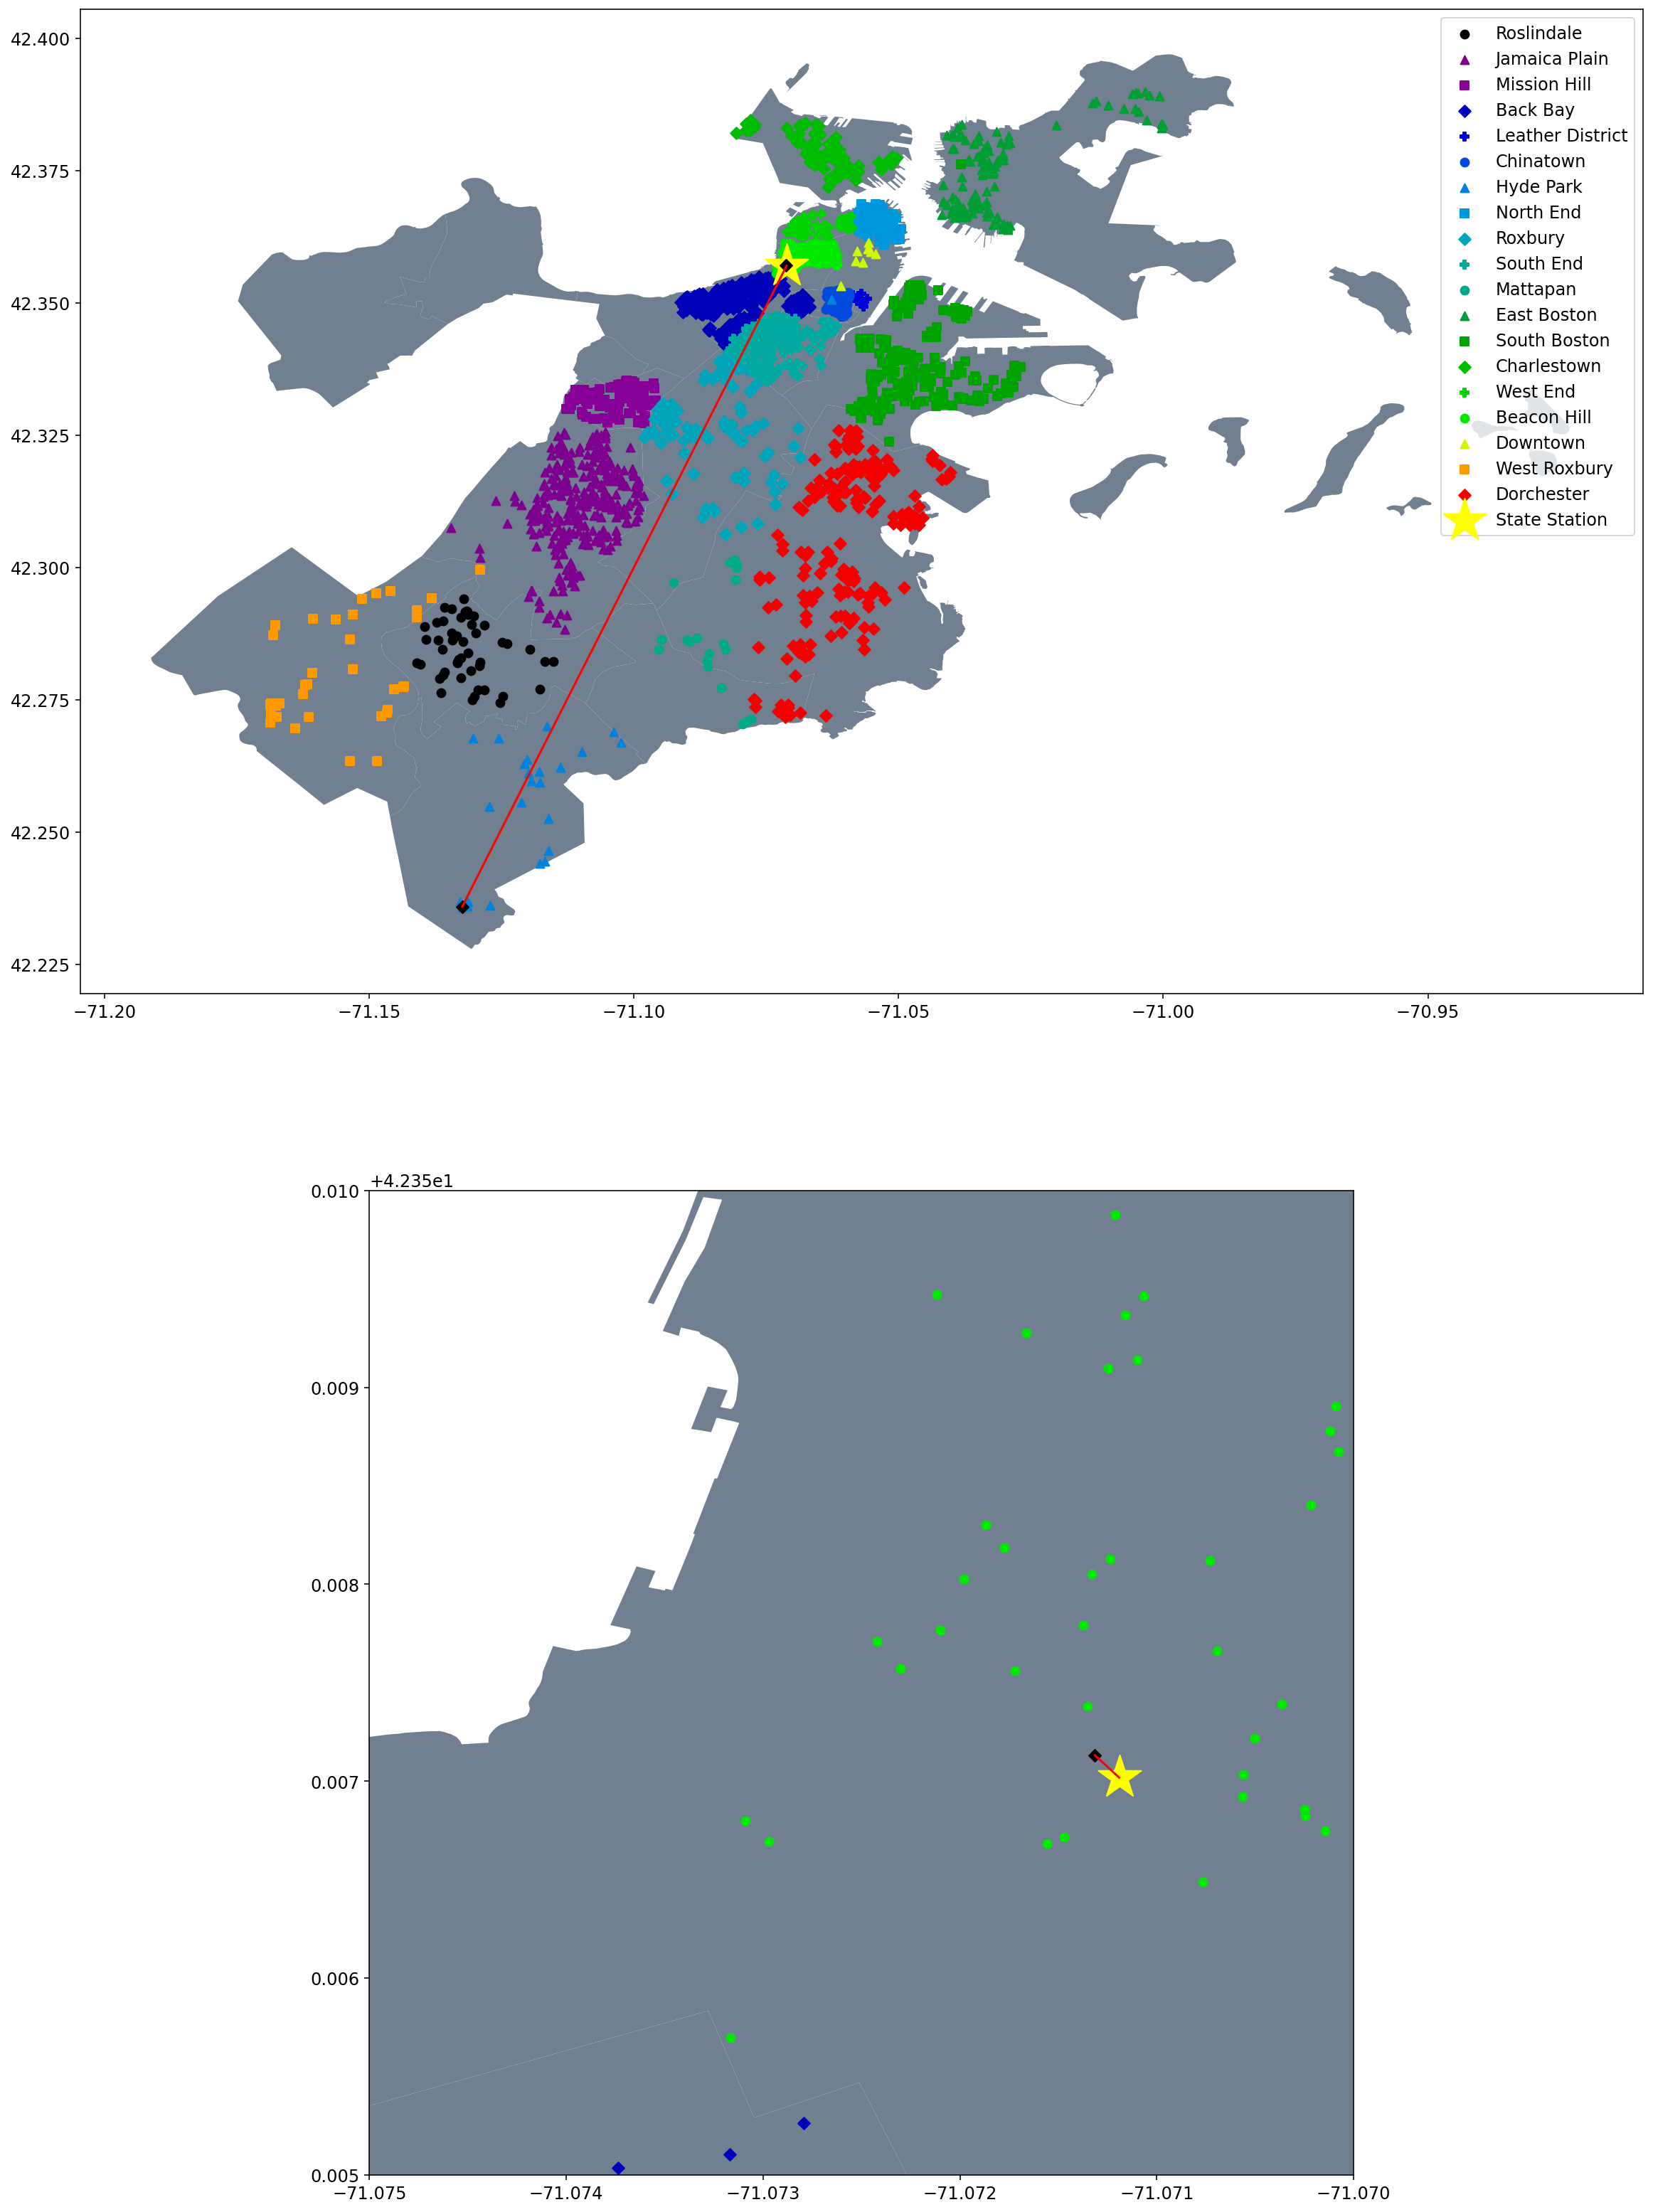

In [ ]:
# Learned how to plot spatial data using geopandas from [2]
# Data retrieved from [3]

import numpy as np
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Read in boston map data
boston_map = gpd.read_file('boston_spatial_data')

# Load spatial data from listings_df
locations = [Point(xy) for xy in zip(listings_df['longitude'], listings_df['latitude'])]
crs = {'init':'EPSG:26986'}
geo_df = gpd.GeoDataFrame(listings_df, crs=crs, geometry=locations)

# Set up plot settings
cmap = plt.get_cmap('nipy_spectral')
all_neighbourhoods = listings_df.neighbourhood.unique()
colors = [cmap(i) for i in np.linspace(0, 1, len(all_neighbourhoods))]
marker_styles = ['o', '^', 's', 'D', 'P']
marker_idx = 0

# Plot map and neighbourhoods
fig,ax = plt.subplots(nrows = 2, ncols=1, figsize=(28, 28))
boston_map.plot(ax=ax[0], color='slategrey')
boston_map.plot(ax=ax[1], color='slategrey')
for idx, neighbourhood in enumerate(all_neighbourhoods):
  if len(listings_df[listings_df['neighbourhood_cleansed'] == neighbourhood]) > 0:
    geo_df[geo_df['neighbourhood'] == neighbourhood].plot(ax=ax[0], markersize=35, label=neighbourhood, color=colors[idx], marker=marker_styles[int(marker_idx%5)], alpha=1)
    geo_df[geo_df['neighbourhood'] == neighbourhood].plot(ax=ax[1], markersize=35, label=neighbourhood, color=colors[idx], marker=marker_styles[int(marker_idx%5)], alpha=1)

    marker_idx += 1

# Set up and plot state station
state_station_df = {'longitude': [-71.071191], 'latitude': [42.3570174]}
state_station_df = [Point(xy) for xy in zip(state_station_df['longitude'], state_station_df['latitude'])]
state_station_geo_df = gpd.GeoDataFrame(state_station_df, crs=crs, geometry=state_station_df)
state_station_geo_df.plot(ax=ax[0], markersize=1000, label='State Station', marker='*', color='yellow')
state_station_geo_df.plot(ax=ax[1], markersize=1000, label='State Station', marker='*', color='yellow')
boston_geo_df = geo_df.to_crs('EPSG:26986')
boston_geo_df.crs

geo_df

# The Furthest SINGLE listing from all listings for the state station
s = gpd.GeoSeries(state_station_df)
p1= boston_geo_df.loc[boston_geo_df.distance(s[0])==boston_geo_df.distance(s[0]).max()]
p2= boston_geo_df.loc[boston_geo_df.distance(s[0])==boston_geo_df.distance(s[0]).min()]
boston_geo_df.loc[boston_geo_df.within(p1),:].plot(ax=ax[0],color='k',marker = 'D')
boston_geo_df.loc[boston_geo_df.within(p2),:].plot(ax=ax[0],color='k', marker = 'D')
ax[0].legend()


boston_geo_df.loc[boston_geo_df.within(p1),:].plot(ax=ax[1],color='k',marker = 'D')
boston_geo_df.loc[boston_geo_df.within(p2),:].plot(ax=ax[1],color='k', marker = 'D')

print(p1.longitude.iloc[0])
print(p1.latitude.iloc[0])
# ax[1].set_xlim(-71.12, -71.14)
# ax[1].set_ylim(42.23, 42.24)

print(p2.longitude.iloc[0])
print(p2.latitude.iloc[0])
ax[1].set_xlim(-71.075, -71.07)
ax[1].set_ylim(42.355, 42.36)
x_values = [-71.071191,-71.07131447263393]
y_values = [42.3570174,42.35713132783332]
ax[1].plot(x_values, y_values, color = 'red')

x_values = [-71.071191,-71.13246485826544]
y_values = [42.3570174,42.235941807706816]

ax[0].plot(x_values, y_values, color = 'red', lable = distance)


In [ ]:
geo_df

id  ...                    geometry
0     12147973  ...  POINT (-71.13307 42.28262)
1      3075044  ...  POINT (-71.13437 42.28624)
2         6976  ...  POINT (-71.13577 42.29244)
3      1436513  ...  POINT (-71.12102 42.28111)
4      7651065  ...  POINT (-71.13626 42.28451)
...        ...  ...                         ...
3580   8373729  ...  POINT (-71.08379 42.38097)
3581  14844274  ...  POINT (-71.11834 42.34750)
3582  14585486  ...  POINT (-71.07130 42.37177)
3583  14603878  ...  POINT (-71.08092 42.38523)
3584  14504422  ...  POINT (-71.08065 42.38789)

[3585 rows x 96 columns]

In [ ]:
# geo_df.crs

#From Tutorial 9 

id  ...                    geometry
0     12147973  ...  POINT (-71.13307 42.28262)
1      3075044  ...  POINT (-71.13437 42.28624)
2         6976  ...  POINT (-71.13577 42.29244)
3      1436513  ...  POINT (-71.12102 42.28111)
4      7651065  ...  POINT (-71.13626 42.28451)
...        ...  ...                         ...
3580   8373729  ...  POINT (-71.08379 42.38097)
3581  14844274  ...  POINT (-71.11834 42.34750)
3582  14585486  ...  POINT (-71.07130 42.37177)
3583  14603878  ...  POINT (-71.08092 42.38523)
3584  14504422  ...  POINT (-71.08065 42.38789)

[3585 rows x 96 columns]

In [ ]:
#find the furthest listing in each neighborhood to the state station 
# # finding the closest point to the centers of the areas 
# p1=gdf.loc[gdf.distance(dh[0])==gdf.distance(dh[0]).max(),:]
# p2=gdf.loc[gdf.distance(dd[0])==gdf.distance(dd[0]).max(),:]
print(state_station_df)

# map with the centers
# ax=boston_map.loc[listings_df['neighbourhood'] ,:].plot(figsize=(20,10))
# gpd.GeoSeries([dh[0],dd[0]]).plot(ax=ax,color='yellow',markersize=400)

# # plot the trajectories points
# gdf.plot(ax=ax,color='g',alpha=0.2)

# # .within()
# # Returns a Series of dtype('bool') with value True for
# # each geometry that is within other.
# # An object is said to be within other if its boundary and interior
# # intersects only with the interior of the other (not its boundary or
# # exterior).
# gdf.loc[gdf.within(p1),:].plot(ax=ax,color='k')
# gdf.loc[gdf.within(p2),:].plot(ax=ax,color='k')

## 3. Building Model

#### 3.a) What task we're solving

Because we are using labelled data in training our model, our task is supervised. Because we are concerned with predicting the valule of a continuous variable, our task is a regression task. Thus we are concerned with solving a supervised regression task.

#### 3.b) Feature Selection

**Visualizing Continuous Variables**

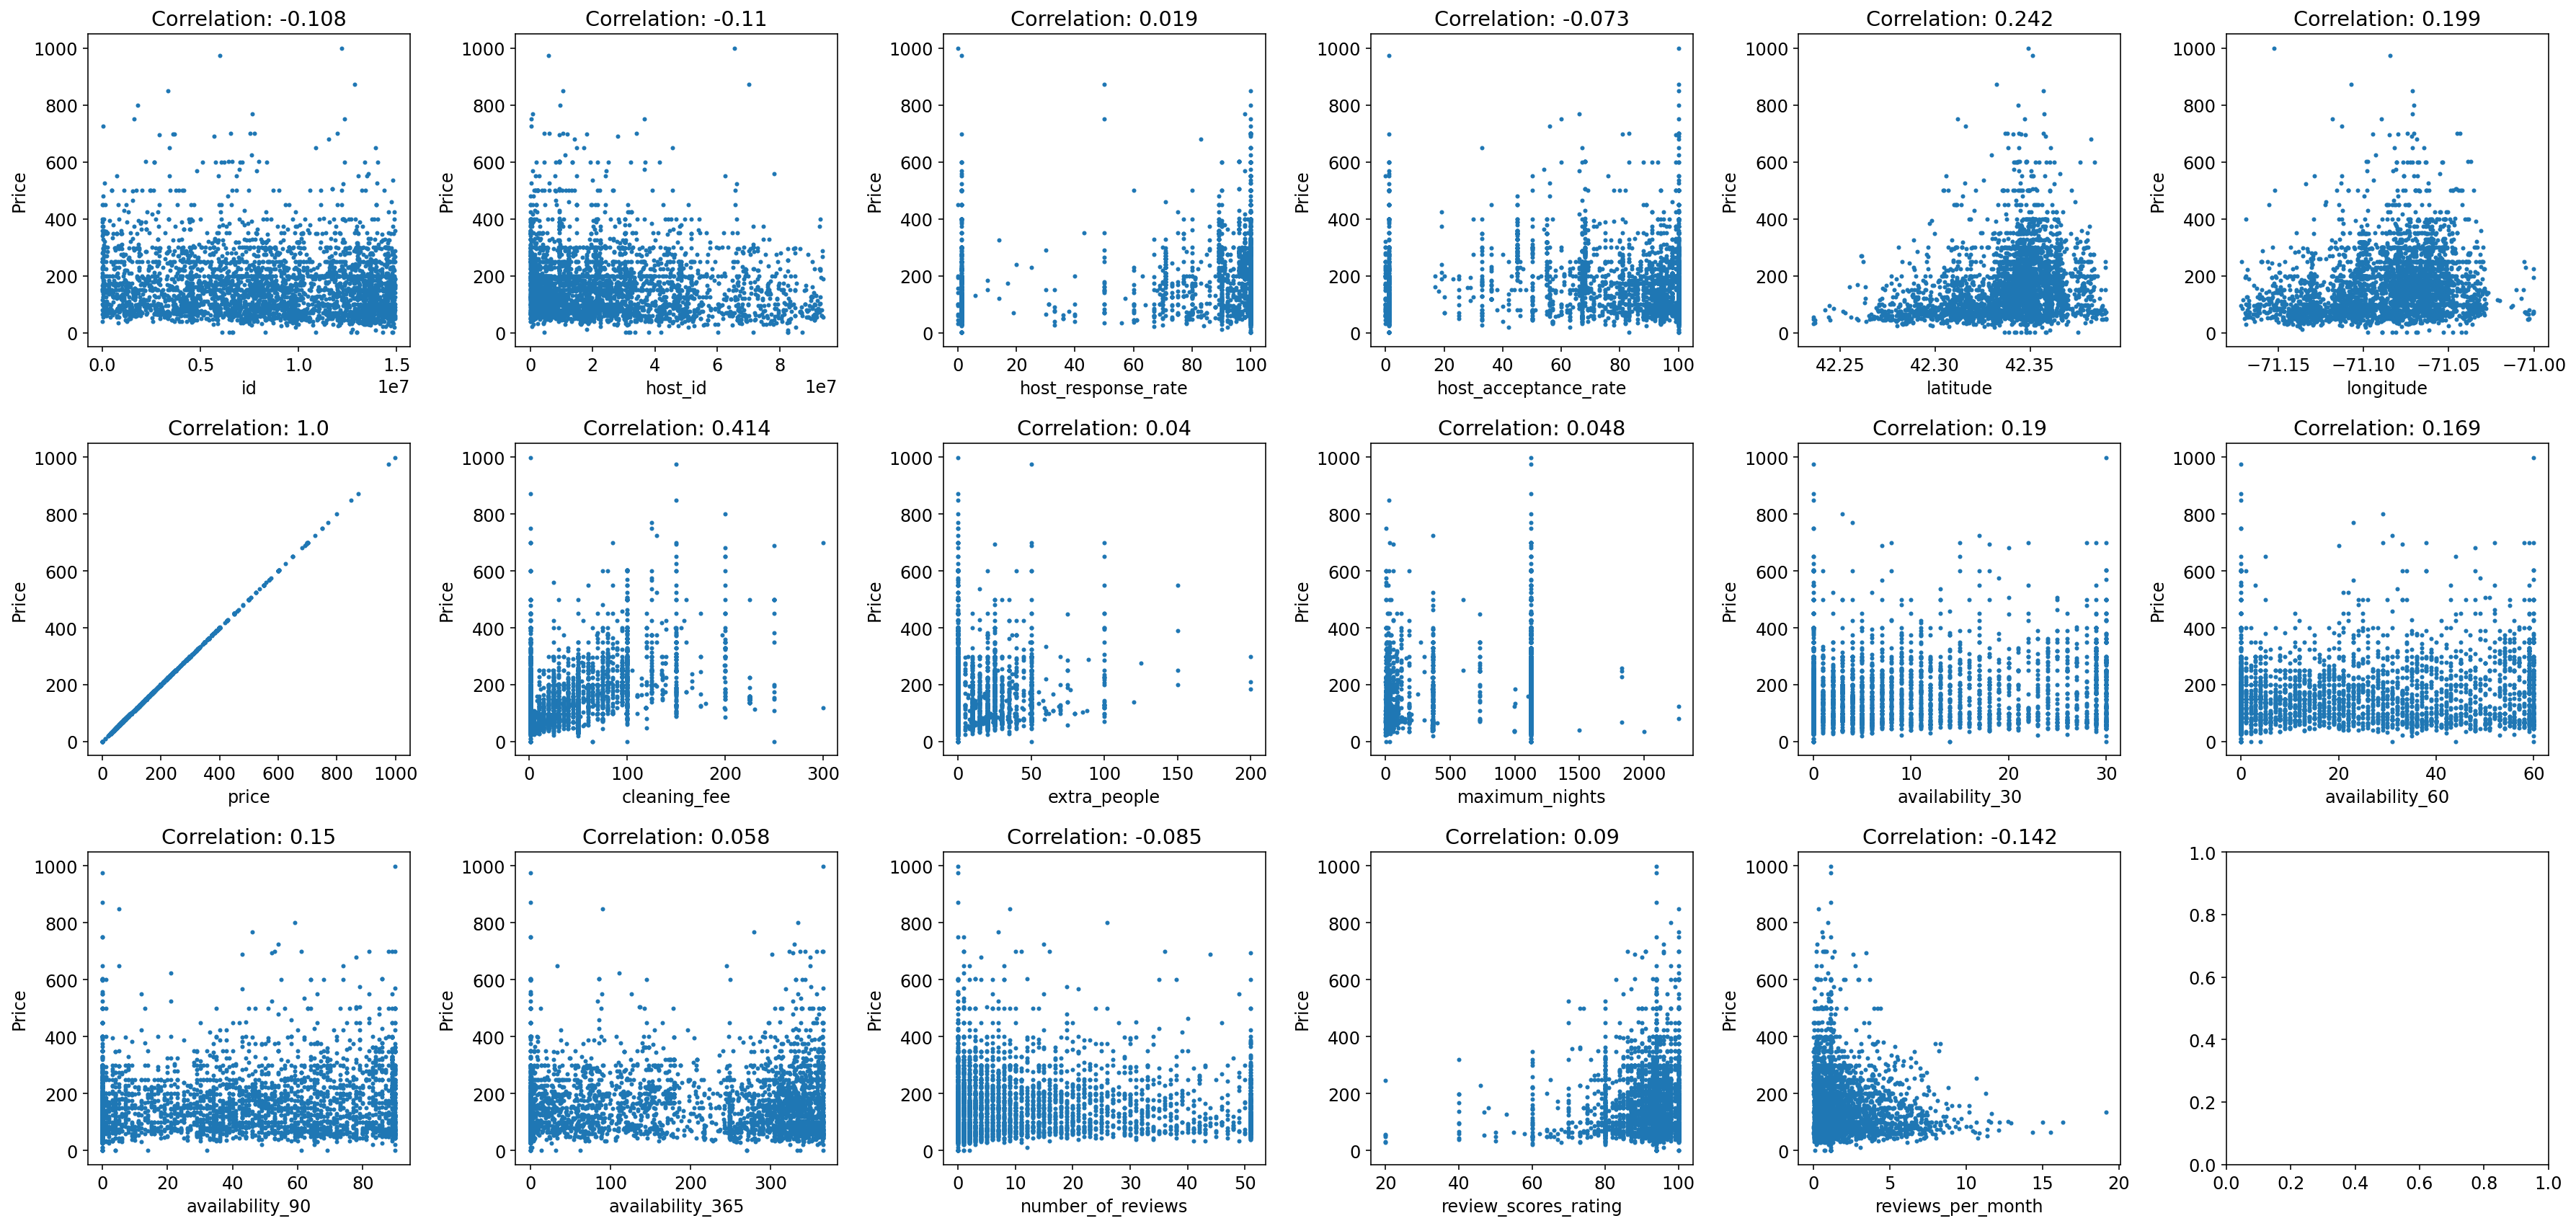

In [105]:
fig, axes = plt.subplots(nrows=int(math.ceil(len(continuous_features) / 6)), ncols=6, figsize=(25, 12), squeeze=False)

for i, feature in enumerate(continuous_features):
  axes[int(i/6)][int(i%6)].scatter(final_listings_df[feature], final_listings_df['price'], s=4)
  axes[int(i/6)][int(i%6)].set_xlabel(feature)
  axes[int(i/6)][int(i%6)].set_ylabel('Price')
  axes[int(i/6)][int(i%6)].set_title("Correlation: {}".format(round(final_listings_df[feature].corr(final_listings_df['price']), 3)))
fig.tight_layout()

Using the above scatterplots we identify the following variables that are worthwhile to keep in our model:

* *longitude, latitude*: the location of the listing is certain to influence the price
* *cleaning_fee*: listings with high prices could also include high cleaning fees
* *review_scores_rating*: this feature has relatively low correlation, but looking at the plot it seems that most of the high price listings also have relatively high ratings, so there could be some worthwhile information here
* *reviews_per_month*: we see an inverse relationship here to what we saw with the score rating. Perhaps listings that are expensive are also reviewed less frequently (because tenants are less likely complain about a high quality listing?)

In [134]:
selected_continuous_features = ['longitude', 'latitude', 'cleaning_fee', 'review_scores_rating', 'reviews_per_month', 'price']

**Visualizing Categorical Variables**

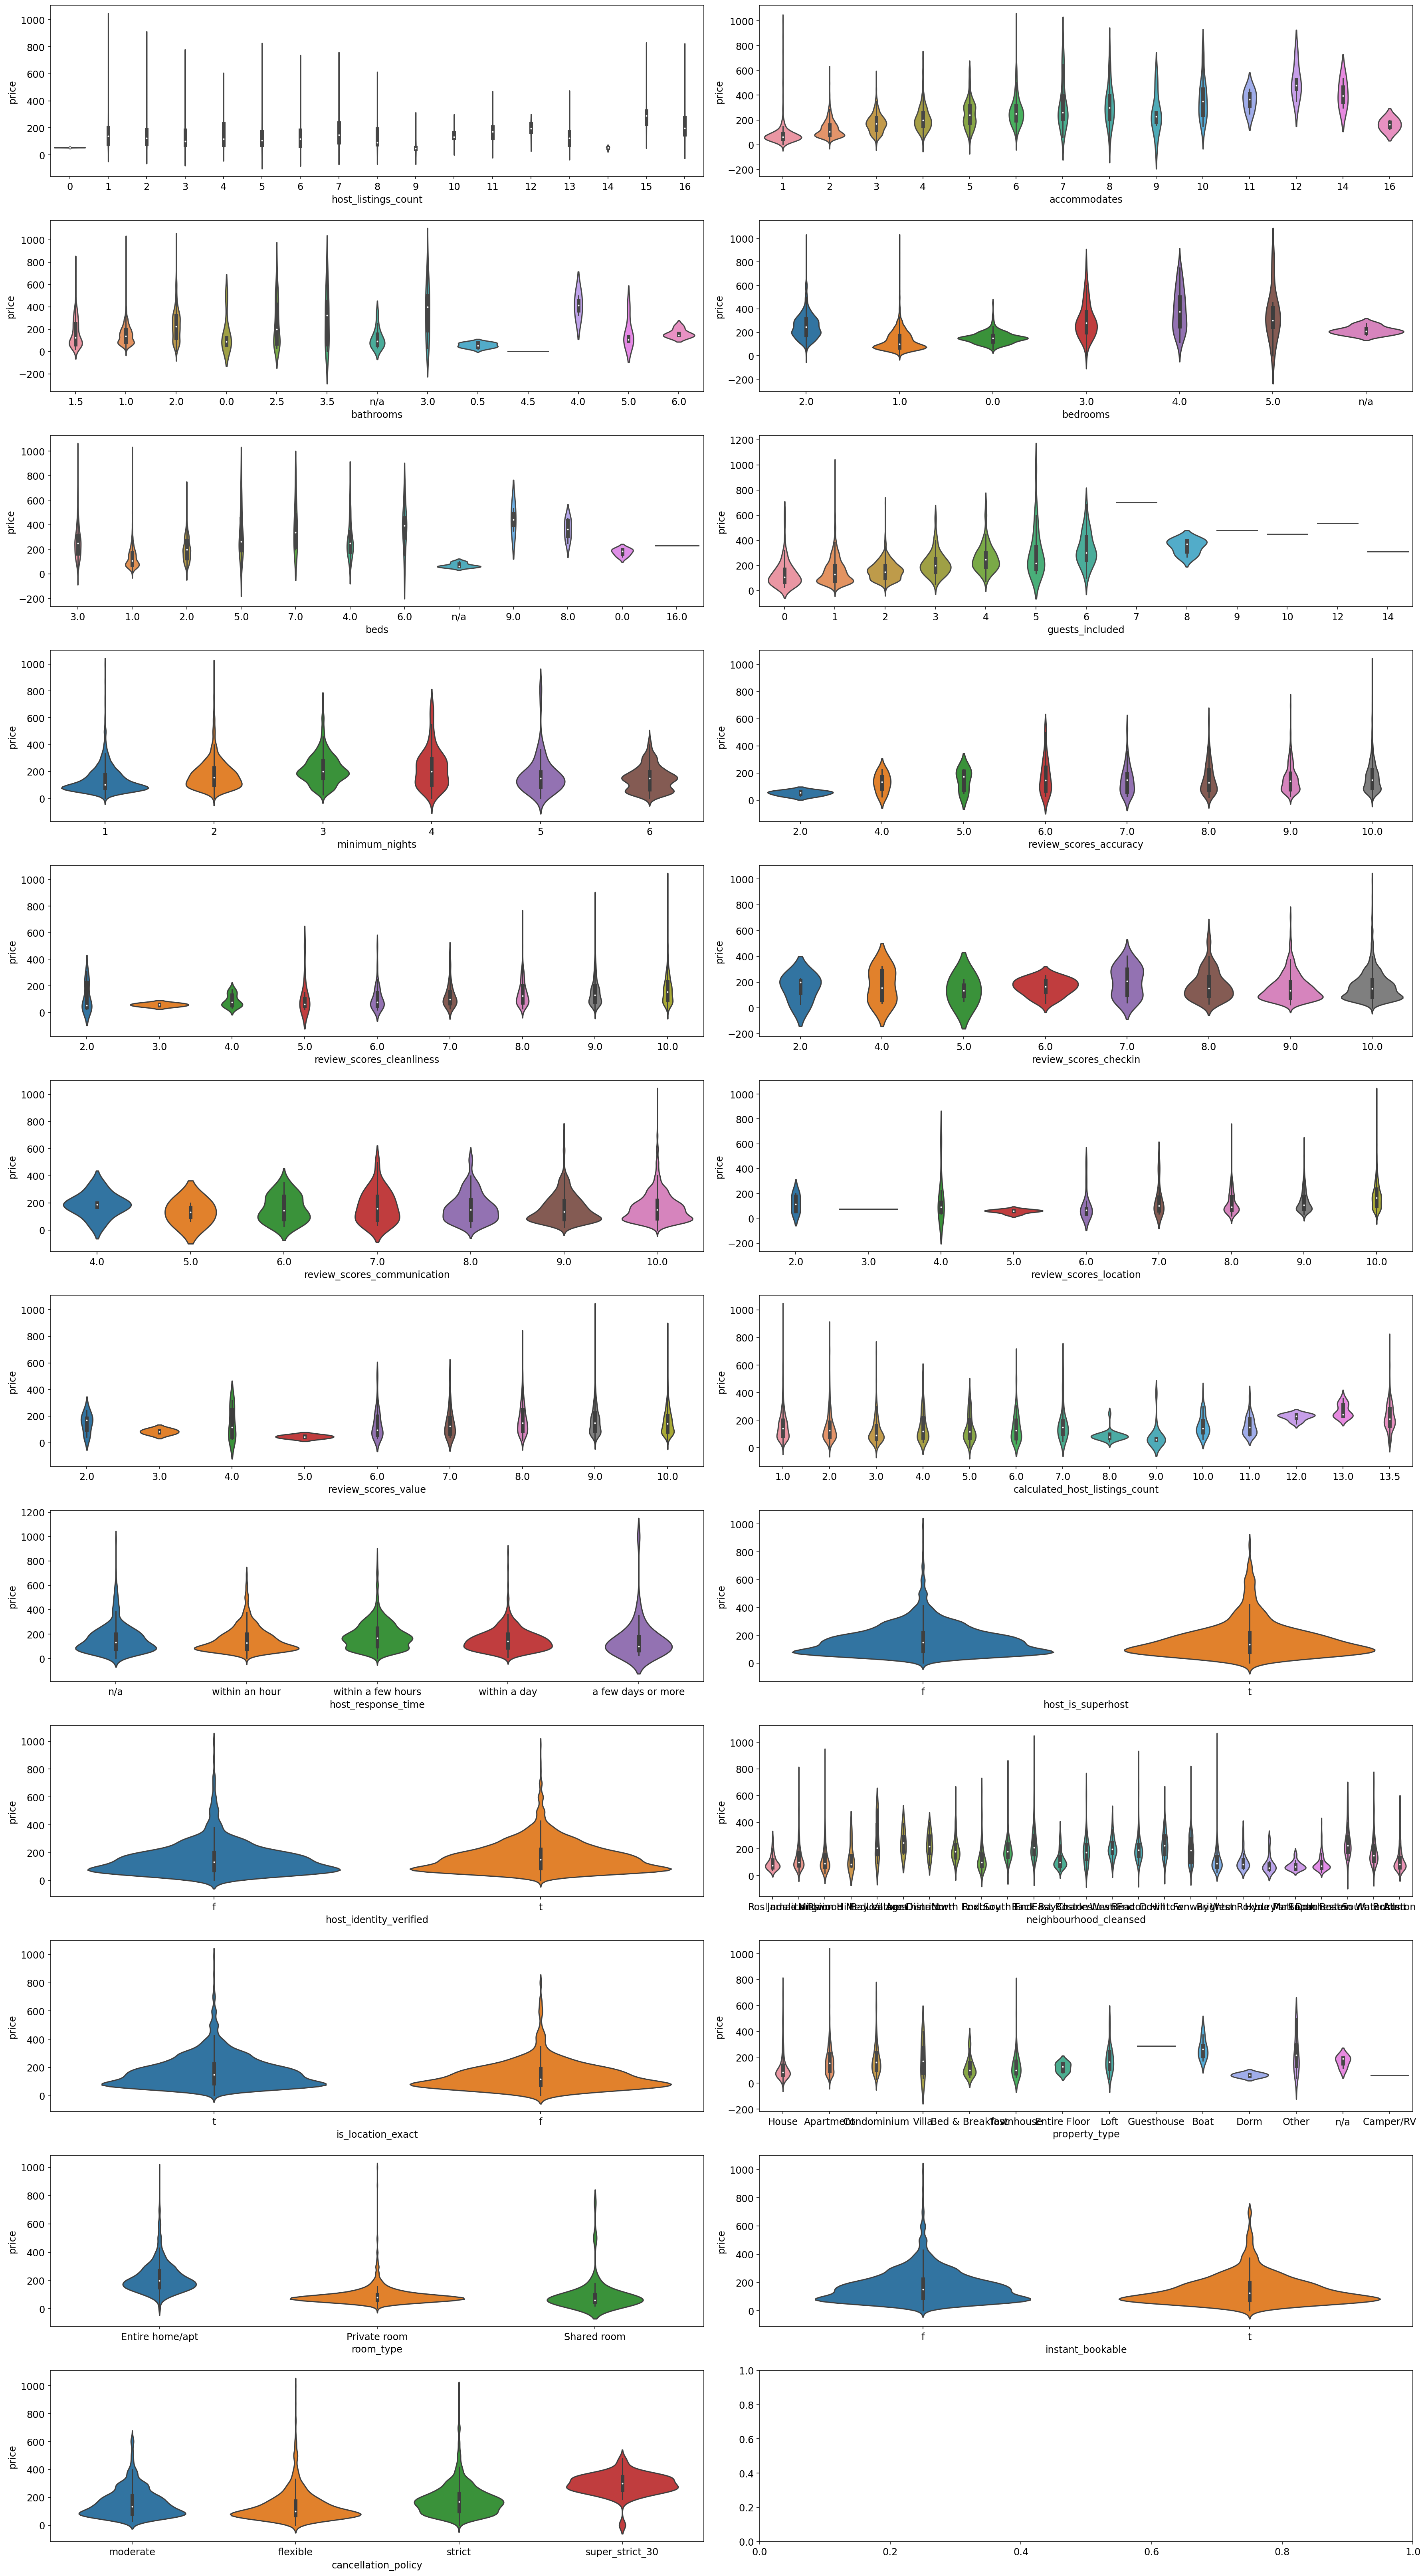

In [110]:
import seaborn as sns

fig, axes = plt.subplots(nrows=int(math.ceil(len(categorical_features) / 2)), ncols=2, figsize=(25, 45), squeeze=True)
for i, feature in enumerate(categorical_features):
  sns.violinplot(x=feature, y='price', data=final_listings_df, ax=axes[int(i/2)][int(i%2)])
fig.tight_layout()

Using the above violinplots we identify the following variables that are worthwhile to keep in our model:

* *accommodates*: price distribution and kernel density varies significantly across the different categories. We notice that the median price for the 11, 12, and 13 categories is more than (median + 1.5 IQR) for the 1 category, for example. Perhaps listings that accommodate more people are typically larger and thus more expensive
* *bathrooms*: price distribution and kernel density varies significantly across the different categories. More bathrooms might correspond to bigger listings that are more expensive
* *bedrooms*: price distribution and kernel density varies significantly across the different categories. More bedrooms might correspond to bigger listings that are more expensive
* *beds*: price distribution and kernel density varies significantly across the different categories. More bathrooms might correspond to bigger listings that are more expensive
* *guests_included*: price distribution and kernel density varies significantly across the different categories. More guests included in the booking might correspond to bigger listings that are more expensive
* *calculated_host_listings_count*: price distribution and kernel density varies significantly across the different categories. Perhaps hosts that have a lot of listings have also spent time and money improving their listings to increase price
* *neighbourhood_cleansed*: price distribution and kernel density varies significantly across the different categories. Some neighbourhoods are more in demand and thus are more expensive
* *property_type*: price distribution and kernel density varies significantly across the different categories. Different property types are more sought after than others
* *room_type*: we can see that the distribution of "entire home/apt" prices are significantly higher than the other two classes. It is likely that hosts need to offer a discount if they are only offering a single room instead of full apt

In [149]:
selected_categorical_features = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'calculated_host_listings_count',
                                 'neighbourhood_cleansed', 'property_type', 'room_type']
selected_features = selected_continuous_features + selected_categorical_features
selected_df = final_listings_df[selected_features].copy()
display(selected_df)

longitude   latitude  ...  property_type        room_type
0    -71.133068  42.282619  ...          House  Entire home/apt
1    -71.134374  42.286241  ...      Apartment     Private room
2    -71.135765  42.292438  ...      Apartment     Private room
3    -71.121021  42.281106  ...          House     Private room
4    -71.136258  42.284512  ...          House     Private room
...         ...        ...  ...            ...              ...
3580 -71.083795  42.380968  ...      Apartment     Private room
3581 -71.118336  42.347503  ...      Apartment     Private room
3582 -71.071300  42.371771  ...      Apartment  Entire home/apt
3583 -71.080923  42.385226  ...      Apartment     Private room
3584 -71.080654  42.387888  ...      Apartment     Private room

[3585 rows x 15 columns]

We note that for our regression models, we will require that our features be in numeric form. Most of our categorical features are already numeric in nature, but the categories associated with the neighbourhood_cleansed, property_type, and room_type features will need to be converted to one-hot encodings.

In [150]:
non_numeric_features = ['neighbourhood_cleansed', 'property_type', 'room_type']
for feature in non_numeric_features:
  one_hots = pd.get_dummies(selected_df[feature])
  selected_df = pd.concat([selected_df, one_hots], axis=1)

final_numeric_df = selected_df.drop(non_numeric_features, axis=1)

display(final_numeric_df)

longitude   latitude  ...  Private room  Shared room
0    -71.133068  42.282619  ...             0            0
1    -71.134374  42.286241  ...             1            0
2    -71.135765  42.292438  ...             1            0
3    -71.121021  42.281106  ...             1            0
4    -71.136258  42.284512  ...             1            0
...         ...        ...  ...           ...          ...
3580 -71.083795  42.380968  ...             1            0
3581 -71.118336  42.347503  ...             1            0
3582 -71.071300  42.371771  ...             0            0
3583 -71.080923  42.385226  ...             1            0
3584 -71.080654  42.387888  ...             1            0

[3585 rows x 54 columns]

#### 3.c) Evaluation Metric

We will use the root mean squared error for our evaluation metric. The mean squared error is appropriate for regression tasks such as ours (it is a continuous analogue to the sum of squared errors often utilized by classification models), but the MSE is not easy for us to interpret during training, besides knowing that smaller is better. The root MSE makes our evaluation metric a little more readible, as the error value will be in the same units as our target variable (ie. dollars).

#### 3.d) Regression Model

In [ ]:
# Harris: if you run all the cells from sections 1 and 3, you should be able to use the final_numeric_df variable to access the fully prepared dataset that's 
# ready to use in your regressiob model. Good luck!

#### 3.e) XGBoost Model

In [ ]:
# After doing some reading I'm going to try to implement XGBoost instead of a neural net. Think it will be more effective and will get to try something new.
# Will be working on this Friday.

# TODO: add distance from station to data set

## References:

1. https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed <a id='1'></a>

2. https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972 <a id='2'></a>

3. https://bostonopendata-boston.opendata.arcgis.com/datasets/3525b0ee6e6b427f9aab5d0a1d0a1a28_0 <a id='3'></a>

4. https://www.datacamp.com/community/tutorials/xgboost-in-python <a id='3'></a>